## Разработка модели машинного обучения на основе данных ассоциацией пастбищ «ЭкоФерма»

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг».

Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

**Цели исследования:**

-изучить данные ассоциации пастбищ «ЭкоФерма»

-проанализировать данные

-обучить модель линейной регрессии

-обучить модель логистической регрессии

**Описание данных:**

-заказчик фермер, владелец молочного хозяйства «Вольный луг»

-данные поделенны на 3 файла

Данные о стаде фермера на текущий момент - ferma_main.csv:

id — уникальный идентификатор коровы

Удой, кг — масса молока, которую корова даёт в год (в килограммах)

ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы

Сырой протеин, г — содержание сырого протеина в корме (в граммах)

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы

Порода — порода коровы

Тип пастбища — ландшафт лугов, на которых паслась корова

порода папы_быка — порода папы коровы

Жирность,% — содержание жиров в молоке (в процентах)

Белок,% — содержание белков в молоке (в процентах)

Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)

Имя папы каждой коровы в стаде фермера — ferma_dad.csv:

id — уникальный идентификатор коровы

Имя Папы — имя папы коровы

Данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой — cow_buy.csv:

Порода — порода коровы

Тип пастбища — ландшафт лугов, на которых паслась корова

порода папы_быка — порода папы коровы

Имя_папы — имя папы коровы

Текущая_жирность,% — содержание жиров в молоке (в процентах)

Текущий_уровень_белок,% — содержание белков в молоке (в процентах)

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)

**Краткий план работы:**

-провести предобработку данных: устранить пропуски, дубликаты

-исследовать данные: найти закономерности,зависимости, визуализировать результаты

-обучить несколько моделей линейной, логистической регресси. Выбрать лучшую, улучшить качество модели

-получить предсказания, отобрать "лучших" коров

## Загрузка данных

In [ ]:
!pip install phik -q

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import phik
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, confusion_matrix,
                             recall_score, precision_score, mean_absolute_error)
import warnings
warnings.filterwarnings('ignore')

Данные представленны в 3 файлах, прочитаем их и сохраним

In [ ]:
df1 = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
df2 = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
df3 = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

In [ ]:
df1.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


Приведем названия колонок к однотипной форме записи

In [ ]:
df1 = df1.rename(columns={'Удой, кг': 'удой_кг',
                         'ЭКЕ (Энергетическая кормовая единица)': 'эке(энергетическая кормовая единица)',
                         'Сырой протеин, г': 'сырой_протеин_г', 'СПО (Сахаро-протеиновое соотношение)':
                         'спо(сахаро-протеиновое соотношение)', 'Порода': 'порода', 'Тип пастбища':'тип_пастбища',
                         'порода папы_быка':'порода_папы-быка', 'Жирность,%':'жирность_%', 'Белок,%':'белок_%',
                         'Вкус молока':'вкус_молока', 'Возраст':'возраст'})

In [ ]:
df1.head()

,id,удой_кг,эке(энергетическая кормовая единица),сырой_протеин_г,спо(сахаро-протеиновое соотношение),порода,тип_пастбища,порода_папы-быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [ ]:
df2.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
df2 = df2.rename(columns={'Имя Папы': 'имя_папы'})

In [ ]:
df2.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
df3.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [ ]:
df3 = df3.rename(columns={'Порода': 'порода', 'Тип пастбища':'тип_пастбища',
                         'порода папы_быка':'порода_папы-быка', 'Текущая_жирность,%':'текущая_жирность_%',
                          'Текущий_уровень_белок,%':'текущий_белок_%',
                         'Возраст':'возраст', 'Имя_папы':'имя_папы'})

In [ ]:
df3.head()

,порода,тип_пастбища,порода_папы-быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    634 non-null    int64 
 1   удой_кг                               634 non-null    int64 
 2   эке(энергетическая кормовая единица)  634 non-null    object
 3   сырой_протеин_г                       634 non-null    int64 
 4   спо(сахаро-протеиновое соотношение)   634 non-null    object
 5   порода                                634 non-null    object
 6   тип_пастбища                          634 non-null    object
 7   порода_папы-быка                      634 non-null    object
 8   жирность_%                            634 non-null    object
 9   белок_%                               634 non-null    object
 10  вкус_молока                           634 non-null    object
 11  возраст                         

В первой таблице 9 колонок типа object (эке(энергетическая кормовая единица), спо(сахаро-протеиновое соотношение), порода, тип_пастбища, порода_папы-быка, жирность_%, белок_%, вкус_молока, возраст), 3 колонки типа int (id, удой_кг, сырой_протеин_г)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Во второй таблице колонка типа object (имя_папы) и колонка типа int (id)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   порода              20 non-null     object
 1   тип_пастбища        20 non-null     object
 2   порода_папы-быка    20 non-null     object
 3   имя_папы            20 non-null     object
 4   текущая_жирность_%  20 non-null     object
 5   текущий_белок_%     20 non-null     object
 6   возраст             20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


В третьей таблице 7 колонок типа object (порода, тип_пастбища, порода_папы-быка, имя_папы, текущая_жирность_%, текущий_белок_%, возраст)

##  Предобработка данных

### Пропуски и дубликаты

Проверим наличие пропусков в данных

In [ ]:
df1.isna().mean()

id                                      0.0
удой_кг                                 0.0
эке(энергетическая кормовая единица)    0.0
сырой_протеин_г                         0.0
спо(сахаро-протеиновое соотношение)     0.0
порода                                  0.0
тип_пастбища                            0.0
порода_папы-быка                        0.0
жирность_%                              0.0
белок_%                                 0.0
вкус_молока                             0.0
возраст                                 0.0
dtype: float64

In [ ]:
df2.isna().mean()

id          0.0
имя_папы    0.0
dtype: float64

In [ ]:
df3.isna().mean()

порода                0.0
тип_пастбища          0.0
порода_папы-быка      0.0
имя_папы              0.0
текущая_жирность_%    0.0
текущий_белок_%       0.0
возраст               0.0
dtype: float64

Пропусков не обнаружено

Проверим дубликаты в данных

In [ ]:
df1.duplicated().sum()

5

Выведем их для наглядности

In [ ]:
df1[df1.duplicated() == True]

,id,удой_кг,эке(энергетическая кормовая единица),сырой_протеин_г,спо(сахаро-протеиновое соотношение),порода,тип_пастбища,порода_папы-быка,жирность_%,белок_%,вкус_молока,возраст
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


Интересно что дубликаты возникли на конечных индексах в наших данный, удалим их

Выведем последние строки df1 чтобы проверить индексы

In [ ]:
df1 = df1.drop_duplicates().reset_index(drop=True)
df1.tail()

,id,удой_кг,эке(энергетическая кормовая единица),сырой_протеин_г,спо(сахаро-протеиновое соотношение),порода,тип_пастбища,порода_папы-быка,жирность_%,белок_%,вкус_молока,возраст
624,625,6812,"15,4",1964,"0,94",РефлешнСоверинг,Равнинное,Айдиал,"3,74","3,075",не вкусно,более_2_лет
625,626,5513,"12,9",1700,"0,88",РефлешнСоверинг,Равнинное,Соверин,"3,64","3,073",вкусно,менее_2_лет
626,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
627,628,5746,"13,8",1994,"0,89",РефлешнСоверинг,Равнинное,Соверин,"3,64","3,077",вкусно,более_2_лет
628,629,6503,"16,2",2283,"0,94",Вис Бик Айдиал,Холмистое,Соверин,"3,71","3,076",вкусно,более_2_лет


In [ ]:
df2.duplicated().sum()

0

In [ ]:
df3.duplicated().sum()

4

In [ ]:
df3[df3.duplicated() == True]

,порода,тип_пастбища,порода_папы-быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Наблюдаем 4 дубликата в заказной таблице фермера о коровах «ЭкоФермы», удалим их

In [ ]:
df3 = df3.drop_duplicates().reset_index(drop=True)
df3.tail()

,порода,тип_пастбища,порода_папы-быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
11,Вис Бик Айдиал,холмистое,Соверин,Барин,"3,42","3,075",менее_2_лет
12,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,065",более_2_лет
13,Вис Бик Айдиал,холмистое,Соверин,Соловчик,"3,73","3,079",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,77","3,053",менее_2_лет
15,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,34","3,069",более_2_лет


### Неявные дубликаты

Проверим уникальные значения категориальных переменных

In [ ]:
df1['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
df3['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
df1['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

Наблюдаем что значения перемененной 'Равнинное' и 'Равнинные' означает то же самое, обработаем их

In [ ]:
df1.groupby('тип_пастбища')['id'].count()

тип_пастбища
Равнинное    253
Равнинные     25
Холмистое    351
Name: id, dtype: int64

In [ ]:
df1['тип_пастбища'] = df1['тип_пастбища'].apply(lambda x: 'равнинное' if x == 'Равнинные' or x == 'Равнинное' else 'холмистое')

In [ ]:
df1.groupby('тип_пастбища')['id'].count()

тип_пастбища
равнинное    278
холмистое    351
Name: id, dtype: int64

In [ ]:
df3.groupby('тип_пастбища')['порода'].count()

тип_пастбища
равнинное    8
холмистое    8
Name: порода, dtype: int64

По сводным таблицам видим результат обработки переменной

In [ ]:
df1['порода_папы-быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

Значения перемененной 'Айдиал' и 'Айдиалл' означают то же самое, обработаем их

In [ ]:
df3['порода_папы-быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [ ]:
df1.groupby('порода_папы-быка')['id'].count()

порода_папы-быка
Айдиал     240
Айдиалл     78
Соверин    311
Name: id, dtype: int64

In [ ]:
df1['порода_папы-быка'] = df1['порода_папы-быка'].apply(lambda x: 'Айдиал' if x == 'Айдиал' or x == 'Айдиалл' else 'Соверин')

In [ ]:
df1.groupby('порода_папы-быка')['id'].count()

порода_папы-быка
Айдиал     318
Соверин    311
Name: id, dtype: int64

Результат отражен в св. таблицах

In [ ]:
df1['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [ ]:
df2['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [ ]:
df3['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [ ]:
df1['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [ ]:
df3['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df3.duplicated().sum()

0

После приведения к единой форме значений категориальных переменных дубликатов не появилось

### Работа с типами данных

In [ ]:
df1.head()

,id,удой_кг,эке(энергетическая кормовая единица),сырой_протеин_г,спо(сахаро-протеиновое соотношение),порода,тип_пастбища,порода_папы-быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,равнинное,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,равнинное,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    629 non-null    int64 
 1   удой_кг                               629 non-null    int64 
 2   эке(энергетическая кормовая единица)  629 non-null    object
 3   сырой_протеин_г                       629 non-null    int64 
 4   спо(сахаро-протеиновое соотношение)   629 non-null    object
 5   порода                                629 non-null    object
 6   тип_пастбища                          629 non-null    object
 7   порода_папы-быка                      629 non-null    object
 8   жирность_%                            629 non-null    object
 9   белок_%                               629 non-null    object
 10  вкус_молока                           629 non-null    object
 11  возраст                         

Наблюдаем что тип данных df1 в колонках: 'эке(энергетическая кормовая единица)', 'спо(сахаро-протеиновое соотношение)', 'жирность_%', 'белок_%' не соответствует корректному, исправим это

In [ ]:
df1['эке(энергетическая кормовая единица)'].unique()

array(['14,2', '12,8', '14', '12,4', '12,7', '13,2', '14,7', '13,4',
       '13,7', '16,5', '15,4', '14,5', '16', '15,6', '11,5', '15,7',
       '14,3', '15,5', '14,6', '15,9', '15,2', '14,8', '16,4', '11,8',
       '14,4', '16,1', '12,9', '13,8', '13,3', '16,3', '13,9', '14,1',
       '16,7', '15,8', '16,2', '12,2', '14,9', '13,6', '12,5', '16,8',
       '13,5', '15,1', '12,1', '16,6', '15,3', '13,1', '12,3', '11,9',
       '12,6', '15', '13', '12', '11,1', '11,7', '10,9'], dtype=object)

Создадим функцию которая заменяет ',' на '.' для приведения переменной к типу данных float

In [ ]:
def replacement_func(row):
    if ',' in row:
        return row.replace(',', '.')
    else:
        return row

In [ ]:
df1['эке(энергетическая кормовая единица)'] = df1['эке(энергетическая кормовая единица)'].apply(replacement_func)

In [ ]:
df1['эке(энергетическая кормовая единица)'].unique()

array(['14.2', '12.8', '14', '12.4', '12.7', '13.2', '14.7', '13.4',
       '13.7', '16.5', '15.4', '14.5', '16', '15.6', '11.5', '15.7',
       '14.3', '15.5', '14.6', '15.9', '15.2', '14.8', '16.4', '11.8',
       '14.4', '16.1', '12.9', '13.8', '13.3', '16.3', '13.9', '14.1',
       '16.7', '15.8', '16.2', '12.2', '14.9', '13.6', '12.5', '16.8',
       '13.5', '15.1', '12.1', '16.6', '15.3', '13.1', '12.3', '11.9',
       '12.6', '15', '13', '12', '11.1', '11.7', '10.9'], dtype=object)

In [ ]:
df1['эке(энергетическая кормовая единица)'] = df1['эке(энергетическая кормовая единица)'].astype(float)

In [ ]:
df1['эке(энергетическая кормовая единица)'].unique()

array([14.2, 12.8, 14. , 12.4, 12.7, 13.2, 14.7, 13.4, 13.7, 16.5, 15.4,
       14.5, 16. , 15.6, 11.5, 15.7, 14.3, 15.5, 14.6, 15.9, 15.2, 14.8,
       16.4, 11.8, 14.4, 16.1, 12.9, 13.8, 13.3, 16.3, 13.9, 14.1, 16.7,
       15.8, 16.2, 12.2, 14.9, 13.6, 12.5, 16.8, 13.5, 15.1, 12.1, 16.6,
       15.3, 13.1, 12.3, 11.9, 12.6, 15. , 13. , 12. , 11.1, 11.7, 10.9])

Применим функцию replacement_func и поменяем тип данных на float у тех колонок где этот тип данных корректен

In [ ]:
df1['спо(сахаро-протеиновое соотношение)'].unique()

array(['0,89', '0,885', '0,93', '0,94', '0,895', '0,95', '0,96', '0,85',
       '0,84', '0,86', '0,88', '0,9'], dtype=object)

In [ ]:
df1['спо(сахаро-протеиновое соотношение)'] = df1['спо(сахаро-протеиновое соотношение)'].apply(replacement_func)

In [ ]:
df1['спо(сахаро-протеиновое соотношение)'] = df1['спо(сахаро-протеиновое соотношение)'].astype(float)

In [ ]:
df1['спо(сахаро-протеиновое соотношение)'].unique()

array([0.89 , 0.885, 0.93 , 0.94 , 0.895, 0.95 , 0.96 , 0.85 , 0.84 ,
       0.86 , 0.88 , 0.9  ])

In [ ]:
df1['жирность_%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,73', '3,13', '3,48', '3,55',
       '3,71', '3,72', '3,61', '3,22', '3,03', '3,49', '3,31', '3,7',
       '3,74', '3,21', '3,11', '3,25', '3,34', '3,24', '3,53', '3,16',
       '3,26', '3,57', '3,44', '3,38', '3,18', '3,42', '3,62', '3,75',
       '3,41', '3,27', '3,63', '3,12', '3,64', '3,69', '3,37', '3,65',
       '3,33', '3,28', '3,35', '3,32', '3,23', '3,15', '3,01', '2,99',
       '3,39', '3,19'], dtype=object)

In [ ]:
df1['жирность_%'] = df1['жирность_%'].apply(replacement_func)

In [ ]:
df1['жирность_%'] = df1['жирность_%'].astype(float)

In [ ]:
df1['жирность_%'].unique()

array([3.58, 3.54, 3.59, 3.4 , 3.73, 3.13, 3.48, 3.55, 3.71, 3.72, 3.61,
       3.22, 3.03, 3.49, 3.31, 3.7 , 3.74, 3.21, 3.11, 3.25, 3.34, 3.24,
       3.53, 3.16, 3.26, 3.57, 3.44, 3.38, 3.18, 3.42, 3.62, 3.75, 3.41,
       3.27, 3.63, 3.12, 3.64, 3.69, 3.37, 3.65, 3.33, 3.28, 3.35, 3.32,
       3.23, 3.15, 3.01, 2.99, 3.39, 3.19])

In [ ]:
df1['белок_%'].unique()

array(['3,076', '3,079', '3,074', '3,075', '3,073', '3,078', '3,077',
       '3,071', '3,08', '3,072', '3,081', '3,082', '3,07', '3,069',
       '3,085'], dtype=object)

In [ ]:
df1['белок_%'] = df1['белок_%'].apply(replacement_func)

In [ ]:
df1['белок_%'] = df1['белок_%'].astype(float)

In [ ]:
df1['белок_%'].unique()

array([3.076, 3.079, 3.074, 3.075, 3.073, 3.078, 3.077, 3.071, 3.08 ,
       3.072, 3.081, 3.082, 3.07 , 3.069, 3.085])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    629 non-null    int64  
 1   удой_кг                               629 non-null    int64  
 2   эке(энергетическая кормовая единица)  629 non-null    float64
 3   сырой_протеин_г                       629 non-null    int64  
 4   спо(сахаро-протеиновое соотношение)   629 non-null    float64
 5   порода                                629 non-null    object 
 6   тип_пастбища                          629 non-null    object 
 7   порода_папы-быка                      629 non-null    object 
 8   жирность_%                            629 non-null    float64
 9   белок_%                               629 non-null    float64
 10  вкус_молока                           629 non-null    object 
 11  возраст            

По итогу в первой таблице 5 колонок типа object (порода, тип_пастбища, порода_папы-быка, вкус_молока, возраст), 3 колонки типа int (id, удой_кг, сырой_протеин_г), 4 колонки типа float (эке(энергетическая кормовая единица), спо(сахаро-протеиновое соотношение), жирность_%, белок_%)

In [ ]:
df3.head()

,порода,тип_пастбища,порода_папы-быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   порода              16 non-null     object
 1   тип_пастбища        16 non-null     object
 2   порода_папы-быка    16 non-null     object
 3   имя_папы            16 non-null     object
 4   текущая_жирность_%  16 non-null     object
 5   текущий_белок_%     16 non-null     object
 6   возраст             16 non-null     object
dtypes: object(7)
memory usage: 1.0+ KB


Наблюдаем что тип данных df3 в колонках: 'текущая_жирность_%', 'текущий_белок_%' не является корректным

In [ ]:
df3['текущая_жирность_%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,64', '3,63', '3,57', '3,73',
       '3,68', '3,42', '3,77', '3,34'], dtype=object)

Применяем функцию replacement_func и меняем тип данных на float в колонках с некорректным типом данных df3

In [ ]:
df3['текущая_жирность_%'] = df3['текущая_жирность_%'].apply(replacement_func)

In [ ]:
df3['текущая_жирность_%'] = df3['текущая_жирность_%'].astype(float)

In [ ]:
df3['текущая_жирность_%'].unique()

array([3.58, 3.54, 3.59, 3.4 , 3.64, 3.63, 3.57, 3.73, 3.68, 3.42, 3.77,
       3.34])

In [ ]:
df3['текущий_белок_%'].unique()

array(['3,076', '3,081', '3,074', '3,061', '3,053', '3,079', '3,055',
       '3,073', '3,046', '3,075', '3,065', '3,069'], dtype=object)

In [ ]:
df3['текущий_белок_%'] = df3['текущий_белок_%'].apply(replacement_func)

In [ ]:
df3['текущий_белок_%'] = df3['текущий_белок_%'].astype(float)

In [ ]:
df3['текущий_белок_%'].unique()

array([3.076, 3.081, 3.074, 3.061, 3.053, 3.079, 3.055, 3.073, 3.046,
       3.075, 3.065, 3.069])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   порода              16 non-null     object 
 1   тип_пастбища        16 non-null     object 
 2   порода_папы-быка    16 non-null     object 
 3   имя_папы            16 non-null     object 
 4   текущая_жирность_%  16 non-null     float64
 5   текущий_белок_%     16 non-null     float64
 6   возраст             16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


По результату в третьей таблице 5 колонок типа object (порода, тип_пастбища, порода_папы-быка, имя_папы, возраст), 2 колонки типа float (текущая_жирность_%, текущий_белок_%)

## Исследовательский анализ данных

In [ ]:
df1.head()

,id,удой_кг,эке(энергетическая кормовая единица),сырой_протеин_г,спо(сахаро-протеиновое соотношение),порода,тип_пастбища,порода_папы-быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


###  Годовая масса молока, которую даёт корова

Построим гистограмму и посмотрим на основные параметры удой_кг

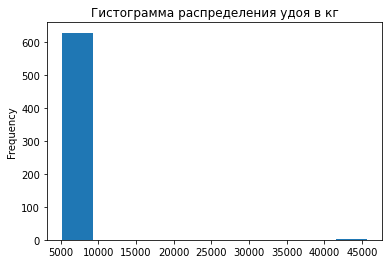

In [ ]:
df1['удой_кг'].plot(kind='hist', title = 'Гистограмма распределения удоя в кг').legend = False

Наблюдам длинный правый 'хвост' на гистограмме, что свидетельствует о наличии выбросов в колонке

In [ ]:
df1['удой_кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64

Наблюдаем большой размах между 3 квартилем и макс значением переменной

Построим 'боксплот' и поглядим на выбросы

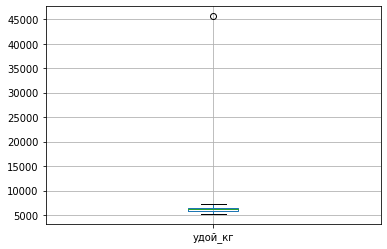

In [ ]:
df1.boxplot(column=['удой_кг']).legend = False

In [ ]:
df1['удой_кг'].quantile(0.995)

7200.4400000000005

По графику видим что одно значение сильно выбивается от остальных, и что 99.5% значений находятся ниже отметки в 7200

In [ ]:
df1[df1['удой_кг'] > 7200]

,id,удой_кг,эке(энергетическая кормовая единица),сырой_протеин_г,спо(сахаро-протеиновое соотношение),порода,тип_пастбища,порода_папы-быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет
70,71,7222,16.8,2157,0.95,Вис Бик Айдиал,холмистое,Айдиал,3.70,3.076,вкусно,более_2_лет
135,136,7207,16.6,2343,0.94,Вис Бик Айдиал,холмистое,Айдиал,3.72,3.078,вкусно,более_2_лет
296,297,7201,15.8,2077,0.94,РефлешнСоверинг,холмистое,Айдиал,3.71,3.072,вкусно,более_2_лет


Создадим функцию slice_quantile которая приводит аномальные значения к "усам боксплота"

In [ ]:
def slice_quantile(column):
    IQR = Q3 - Q1
    max_q = Q3+1.5*IQR
    min_q = Q1-1.5*IQR
    try:
        if column < min_q:
            return min_q
        elif column > max_q:
            return max_q
        else:
            return column
    except:
        return column

In [ ]:
Q1 = df1['удой_кг'].quantile(0.25)
Q3 = df1['удой_кг'].quantile(0.75)
df1['удой_кг'] = df1['удой_кг'].apply(slice_quantile)

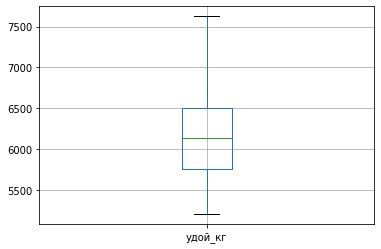

In [ ]:
df1.boxplot(column=['удой_кг']).legend = False

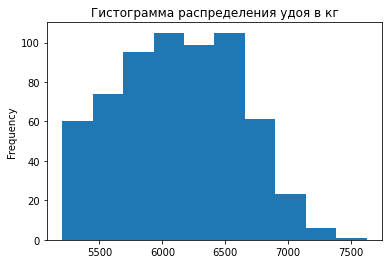

In [ ]:
df1['удой_кг'].plot(kind='hist', title = 'Гистограмма распределения удоя в кг').legend = False

In [ ]:
df1['удой_кг'].describe()

count     629.000000
mean     6128.352941
std       479.225021
min      5204.000000
25%      5751.000000
50%      6133.000000
75%      6501.000000
max      7626.000000
Name: удой_кг, dtype: float64

Гистограмма напоминает нормальное распределение со 'скосом' к левому краю, разброс массы молока варьируется от 5204 до 7626 кг, в среднем удой состовляет 6128 кг, единственное аномальное значение привели к краю значений которые мы не считаем аномальными

### Показатель питательности корма коровы

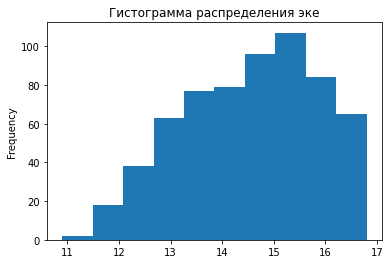

In [ ]:
df1['эке(энергетическая кормовая единица)'].plot(kind='hist', title = 'Гистограмма распределения эке').legend = False

In [ ]:
df1['эке(энергетическая кормовая единица)'].describe()

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке(энергетическая кормовая единица), dtype: float64

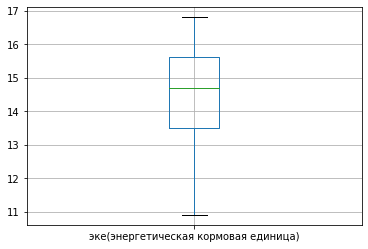

In [ ]:
df1.boxplot(column=['эке(энергетическая кормовая единица)']).legend = False

Напоминает нормальное распределение со 'скосом' по правому краю, разброс эке варьируется от 10.9 до 16.8, в среднем 14.54, аномальных значений не наблюдаем

### Содержание сырого протеина в корме

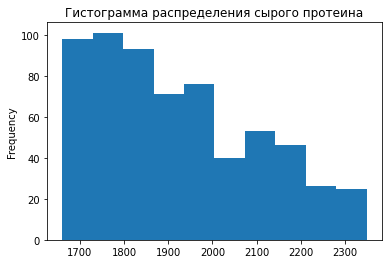

In [ ]:
df1['сырой_протеин_г'].plot(kind='hist', title = 'Гистограмма распределения сырого протеина').legend = False

In [ ]:
df1['сырой_протеин_г'].describe()

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: сырой_протеин_г, dtype: float64

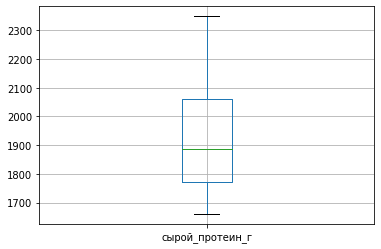

In [ ]:
df1.boxplot(column=['сырой_протеин_г']).legend = False

Напоминает распределение Пуасона со 'скосом' к левому краю, разброс содержание сырого протеина варьируется от 1660 до 2349, в среднем 1923, аномальных значений не наблюдаем

### Отношение сахара к протеину в корме

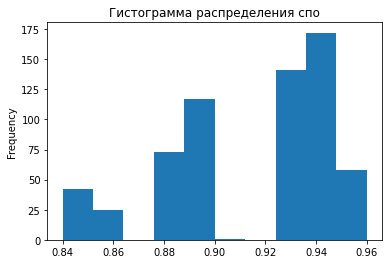

In [ ]:
df1['спо(сахаро-протеиновое соотношение)'].plot(kind='hist', title = 'Гистограмма распределения спо').legend = False

In [ ]:
df1['спо(сахаро-протеиновое соотношение)'].describe()

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо(сахаро-протеиновое соотношение), dtype: float64

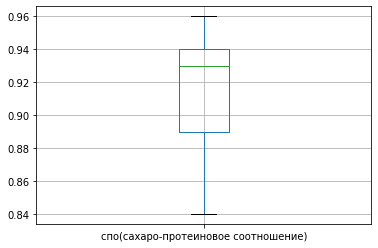

In [ ]:
df1.boxplot(column=['спо(сахаро-протеиновое соотношение)']).legend = False

Напоминает распределение Пуасона со 'скосом' к правому краю с провалами на значениях 0.87, 0.91, 0.92, разброс отношения сахара к протеину варьируется от 0.84 до 0.96, в среднем 0.91, аномальных значений не наблюдаем

### Порода коровы

In [ ]:
t = df1.groupby('порода')['id'].count()
t

порода
Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: id, dtype: int64

In [ ]:
t = t/len(df1) * 100
t

порода
Вис Бик Айдиал     59.300477
РефлешнСоверинг    40.699523
Name: id, dtype: float64

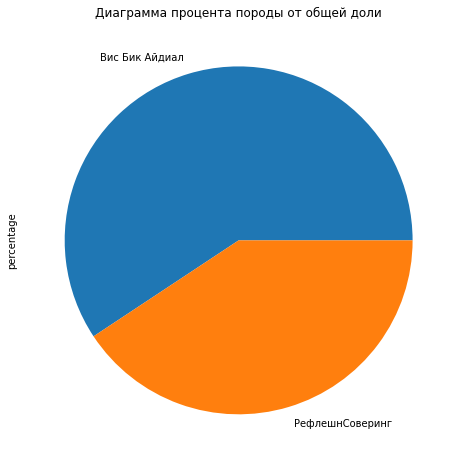

In [ ]:
t.plot(kind='pie', rot=45,figsize = [8, 8], ylabel='percentage',
       title = 'Диаграмма процента породы от общей доли').legend = False

Наблюдаем что число коров породы Вис Бик Айдиал (59.30%) слегка превышает коров породы РефлешнСоверинг (40.69%)

### Тип пастбища

In [ ]:
t = df1.groupby('тип_пастбища')['id'].count()
t = t/len(df1) * 100
t

тип_пастбища
равнинное    44.197138
холмистое    55.802862
Name: id, dtype: float64

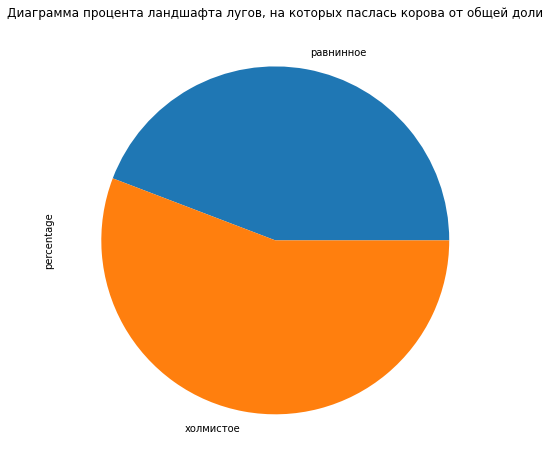

In [ ]:
t.plot(kind='pie', rot=45,figsize = [8, 8], ylabel='percentage',
       title = 'Диаграмма процента ландшафта лугов, на которых паслась корова от общей доли').legend = False

Наблюдаем что коров пасущихся на холмистых лугах (55.80%) больше чем коров которые паслись на равнинной местности (44.19%)

### Порода папы коровы

In [ ]:
t = df1.groupby('порода_папы-быка')['id'].count()
t = t/len(df1) * 100
t

порода_папы-быка
Айдиал     50.556439
Соверин    49.443561
Name: id, dtype: float64

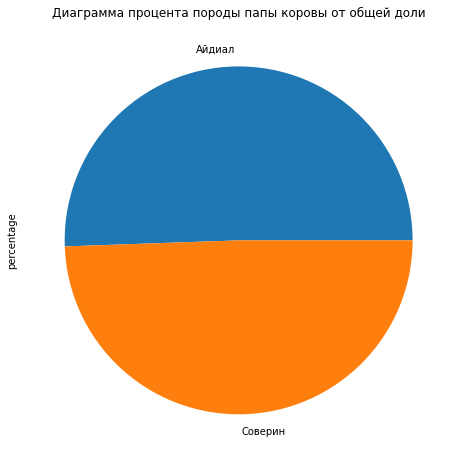

In [ ]:
t.plot(kind='pie', rot=45,figsize = [8, 8], ylabel='percentage',
       title = 'Диаграмма процента породы папы коровы от общей доли').legend = False

Наблюдаем что коров у которых порода папы Айдиал (50.55%) соответствует коровам у которых порода папы Соверин (49.44%)

### Cодержание жиров в молоке

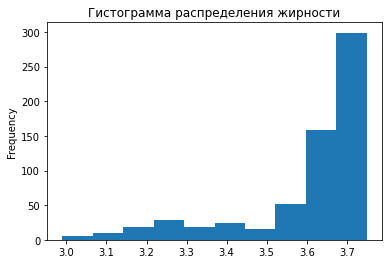

In [ ]:
df1['жирность_%'].plot(kind='hist', title = 'Гистограмма распределения жирности').legend = False

In [ ]:
df1['жирность_%'].describe()

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность_%, dtype: float64

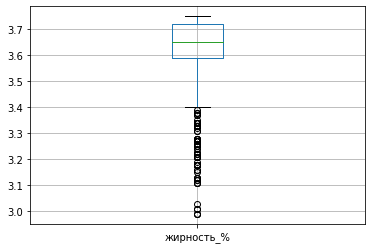

In [ ]:
df1.boxplot(column=['жирность_%']).legend = False

Напоминает распределение Пуасона со 'скосом' к правому краю, разброс жирности варьируется от 2.99 до 3.75 %, в среднем 3.6 %, большинство наблюдений расположенно в правой части распределения из-за чего значения находящиеся в левой части "слегка" выбиваются из общей массы значений, не будем принимать эти значения аномалльными т.к. они похоже на истинные

### Cодержание белка в молоке

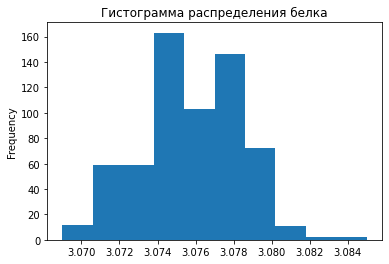

In [ ]:
df1['белок_%'].plot(kind='hist', title = 'Гистограмма распределения белка').legend = False

In [ ]:
df1['белок_%'].describe()

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок_%, dtype: float64

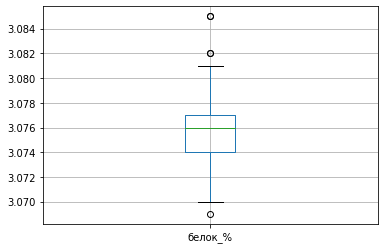

In [ ]:
df1.boxplot(column=['белок_%']).legend = False

Распределение напоминает нормальное с двумя пиковыми значениями 3.078 и 3.075, разброс белка варьируется от 3.069 до 3.085, в среднем 3.075, есть 3 значения 'слегка' выбивающейся из общей массы

### Оценка вкуса по личным критериям фермера

In [ ]:
t = df1.groupby('вкус_молока')['id'].count()
t = t/len(df1) * 100
t

вкус_молока
вкусно       58.982512
не вкусно    41.017488
Name: id, dtype: float64

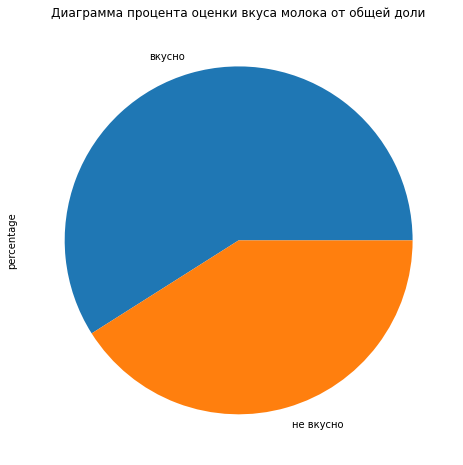

In [ ]:
t.plot(kind='pie', rot=45,figsize = [8, 8], ylabel='percentage',
       title = 'Диаграмма процента оценки вкуса молока от общей доли').legend = False

Наблюдаем что в большинстве случаев фермер оценивал молоко как вкусное (58.98%) нежели как не вкусное (41.01%)

### Возраст коровы

In [ ]:
t = df1.groupby('возраст')['id'].count()
t = t/len(df1) * 100
t

возраст
более_2_лет    82.511924
менее_2_лет    17.488076
Name: id, dtype: float64

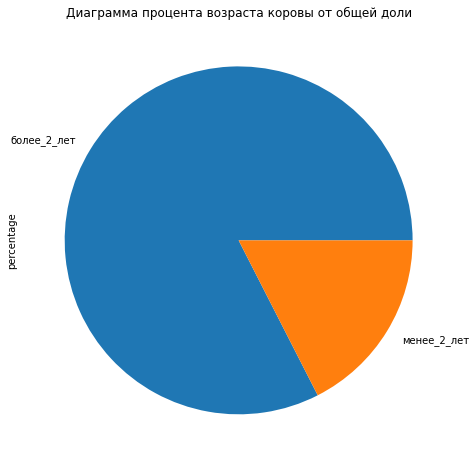

In [ ]:
t.plot(kind='pie', rot=45,figsize = [8, 8], ylabel='percentage',
       title = 'Диаграмма процента возраста коровы от общей доли').legend = False

В большинстве возраст коровы состовляет более 2 лет (82.51%) нежели менее 2 лет (17.48%)

### Имя папы коровы (df2)

In [ ]:
df2.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
t = df2.groupby('имя_папы')['id'].count()
t = t/len(df1) * 100
t

имя_папы
Барин       38.155803
Буйный      34.181240
Геркулес    10.174881
Соловчик    17.488076
Name: id, dtype: float64

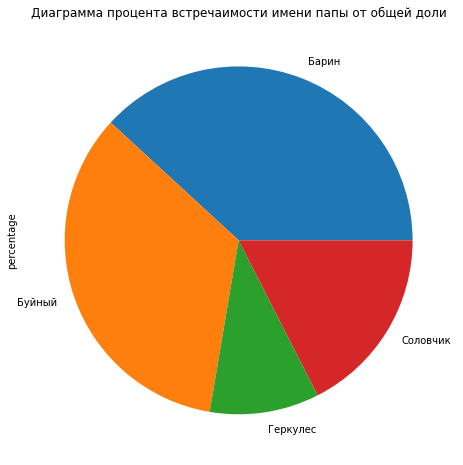

In [ ]:
t.plot(kind='pie', rot=45,figsize = [8, 8], ylabel='percentage',
       title = 'Диаграмма процента встречаимости имени папы от общей доли').legend = False

В большинстве случаев имя папы коровы это Барин (38.15%) и по убывающей доля имени папы от всех коров: Буйный (34.18%), Соловчик (17.48), Геркулес (10.17%)

Учитывая ненормальность распределений некоторых из количественных признаков и необходимость корреляционного анализа категориальных признаков, для анализ подходит коэффициент Фика

## Корреляционный анализ

Построим "хитмап" по матрице корреляций Фика и посмотрим на связь признаков для отслеживания мультиколлинеарности

interval columns not set, guessing: ['id', 'удой_кг', 'эке(энергетическая кормовая единица)', 'сырой_протеин_г', 'спо(сахаро-протеиновое соотношение)', 'жирность_%', 'белок_%']


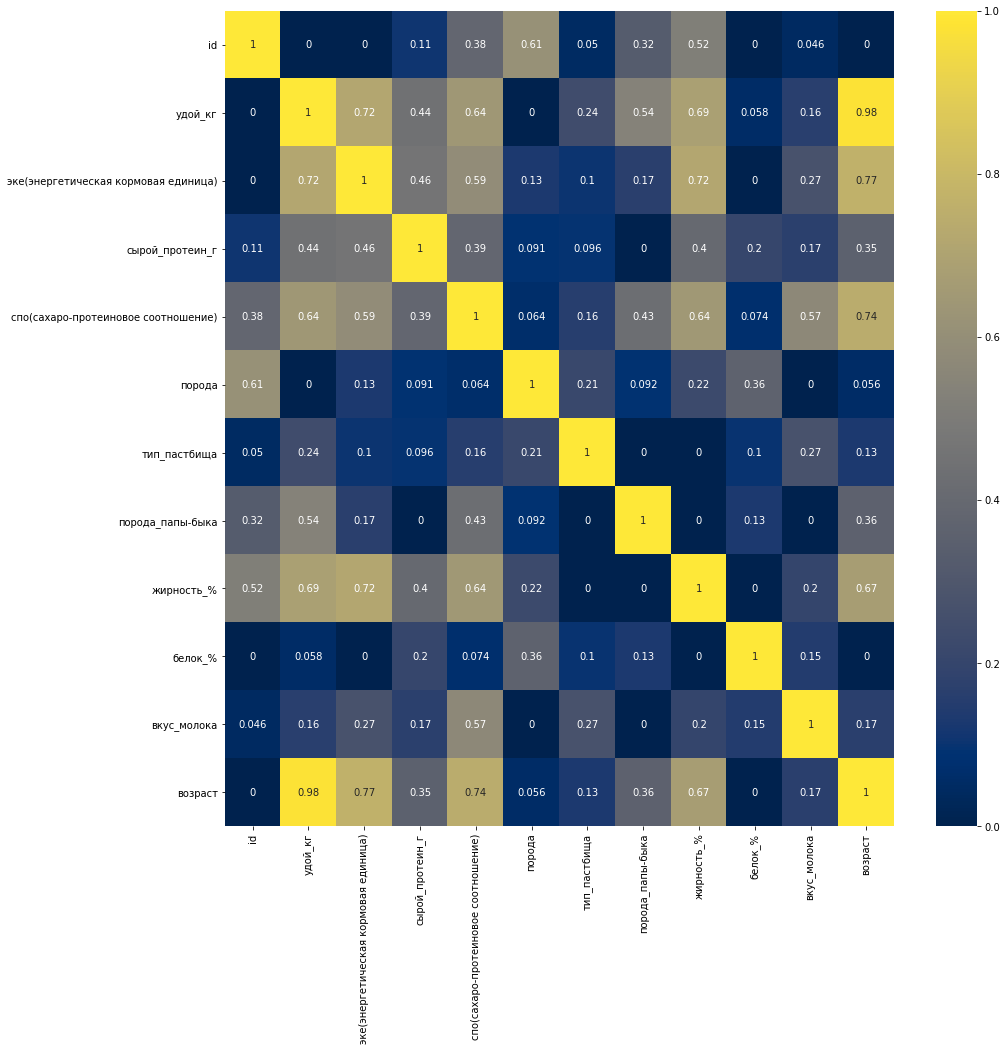

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.phik_matrix(), annot=True, cmap='cividis',).legend = False

Наблюдаем высокую корреляцию между признаками удой_кг и возраст равную 0.98, но тк удой_кг целевой признак а не входной удалять признаки не требуется

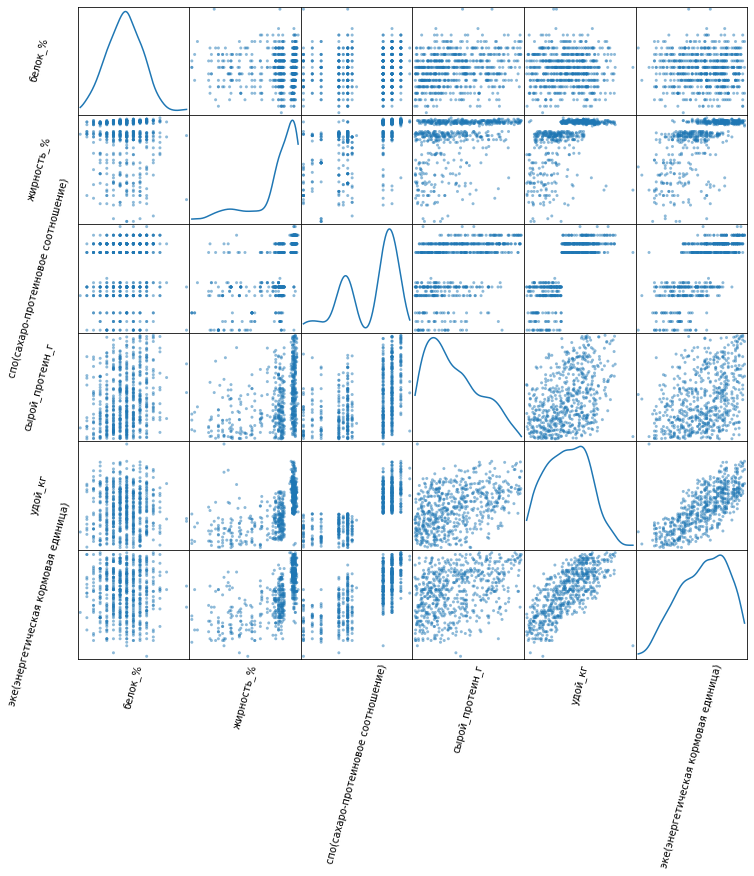

In [ ]:
corr_multi = df1.pivot_table(index='id', values=df1.columns[1:], aggfunc='mean')
sm = pd.plotting.scatter_matrix(corr_multi, figsize=(12, 12), diagonal='kde')

[s.xaxis.label.set_rotation(75) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(75) for s in sm.reshape(-1)]

[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

Посмотрим отдельно на переменные которые имеют коффицент корриляции с целевым признаком выше 0.5, для формирования промежуточных итогов анализа

### Годовая масса молока относително жирности

In [ ]:
df1['удой_category'] = pd.qcut(df1['удой_кг'], 5)
df1.groupby('удой_category')['жирность_%'].agg(['count', 'mean', 'median'])

,count,mean,median
удой_category,,,
"(5203.999, 5652.4]",126,3.429444,3.43
"(5652.4, 5988.2]",126,3.540476,3.61
"(5988.2, 6281.6]",125,3.647120,3.71
"(6281.6, 6564.0]",128,3.698906,3.72
"(6564.0, 7626.0]",124,3.702742,3.72


In [ ]:
df1['удой_кг'].corr(df1['жирность_%'])

0.5824000142046238

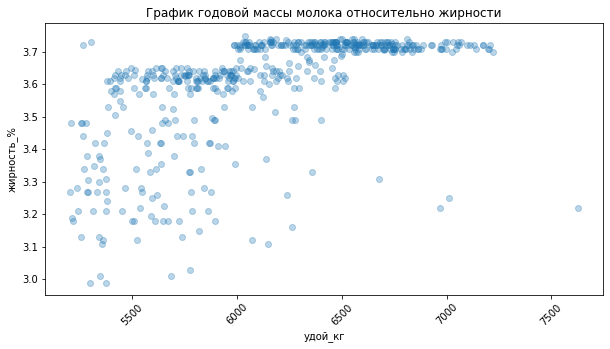

In [ ]:
df1.groupby('удой_кг')['жирность_%'].mean().plot(figsize = [10, 5], style='o', alpha=0.3, rot=45,
                                                  ylabel='жирность_%', title = 'График годовой массы молока относительно жирности'
                                                 ).legend = False

По графику и сводной таблице мы видим что присутствует линейная зависимость, чем больше процент жирности в молоке тем больше годовая масса молока.

Построим диаграмму рассеяния для текущего признака где цвет точек диаграммы отображает признак

#### Цветовой маркер признака 'порода'

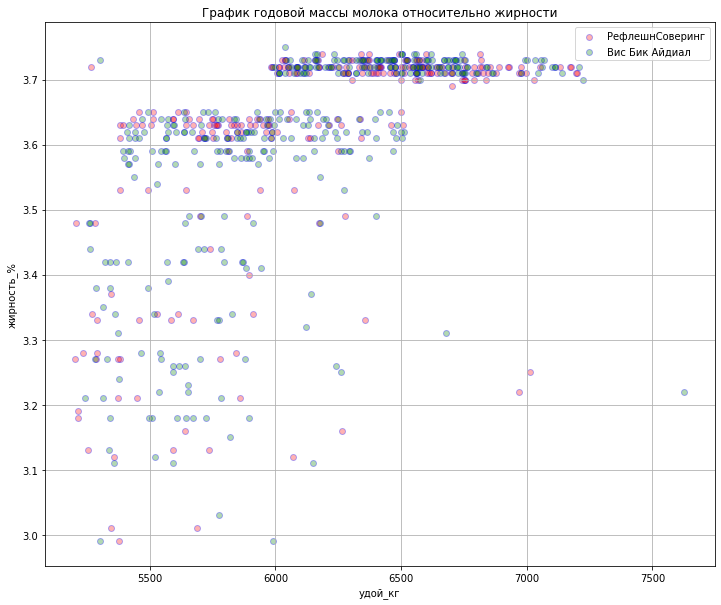

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'РефлешнСоверинг', 'РефлешнСоверинг'], ['green', 'Вис Бик Айдиал', 'Вис Бик Айдиал']:
    y = df1[df1['порода'] == row]['жирность_%']
    x = df1[df1['порода'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('жирность_%')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно жирности')
plt.grid(True)
plt.show()

Распределяется вне зависимо от породы. Цветовой маркер случаен

#### Цветовой маркер признака 'тип_пастбища'

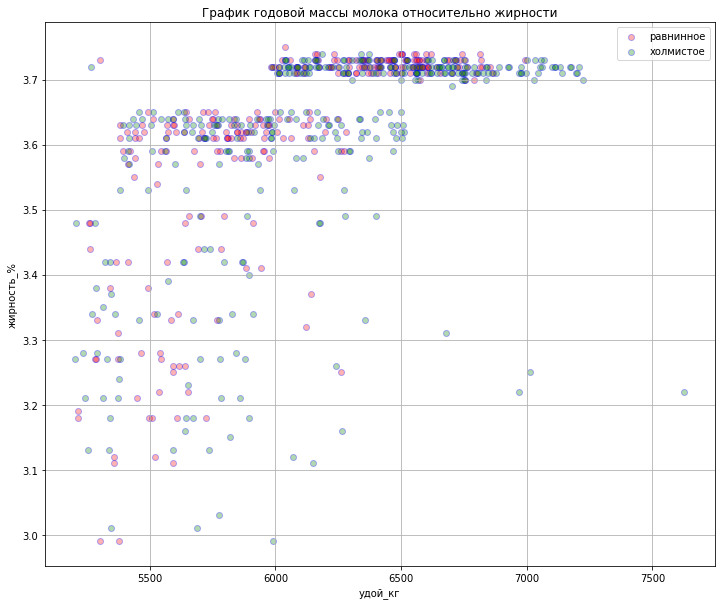

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'равнинное', 'равнинное'], ['green', 'холмистое', 'холмистое']:
    y = df1[df1['тип_пастбища'] == row]['жирность_%']
    x = df1[df1['тип_пастбища'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('жирность_%')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно жирности')
plt.grid(True)
plt.show()

Наблюдается чуть повышенная годовая масса молока у типа пастбища 'холмистое'. Корреляция прослеживается вне зависимости от типа пастбища

#### Цветовой маркер признака 'порода_папы-быка'

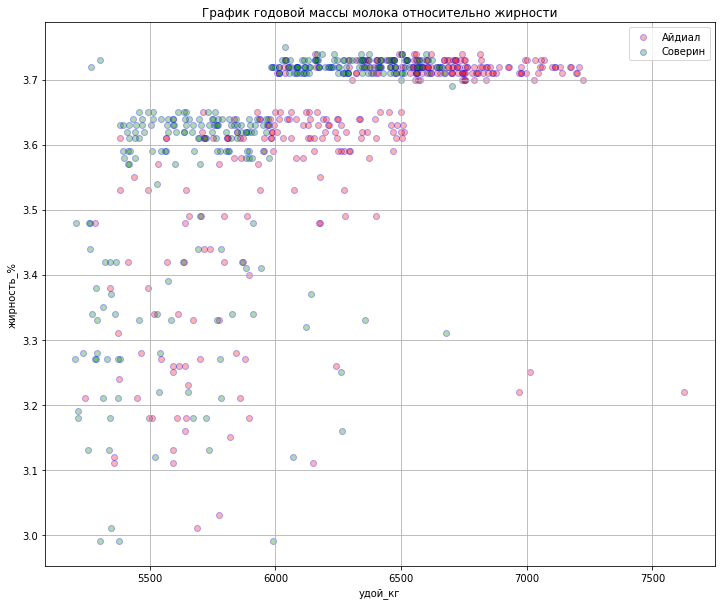

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'Айдиал', 'Айдиал'], ['green', 'Соверин', 'Соверин']:
    y = df1[df1['порода_папы-быка'] == row]['жирность_%']
    x = df1[df1['порода_папы-быка'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('жирность_%')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно жирности')
plt.grid(True)
plt.show()

Повышенная годовая масса молока у породы папы-быка 'Айдиал'. Корреляция прослеживается вне зависимости от типа пастбища

#### Цветовой маркер признака 'вкус_молока'

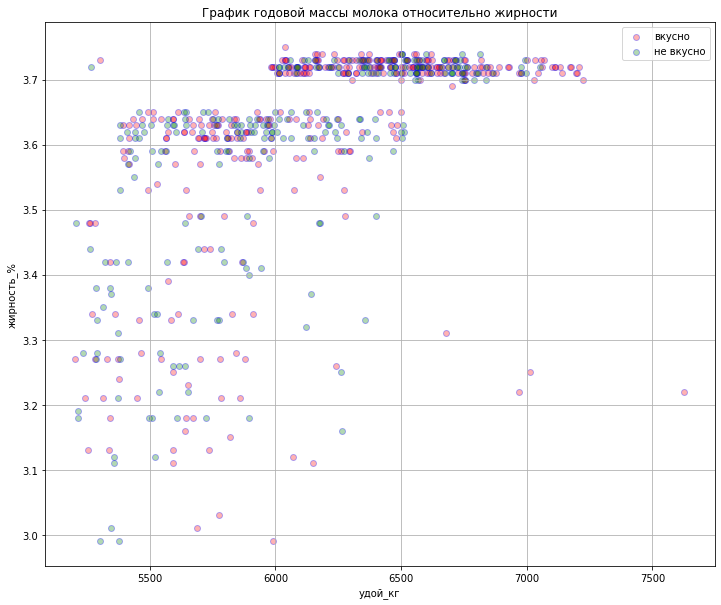

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'вкусно', 'вкусно'], ['green', 'не вкусно', 'не вкусно']:
    y = df1[df1['вкус_молока'] == row]['жирность_%']
    x = df1[df1['вкус_молока'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('жирность_%')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно жирности')
plt.grid(True)
plt.show()

Распределяется вне зависимо от вкуса молока. Цветовой маркер случаен

#### Цветовой маркер признака 'возраст'

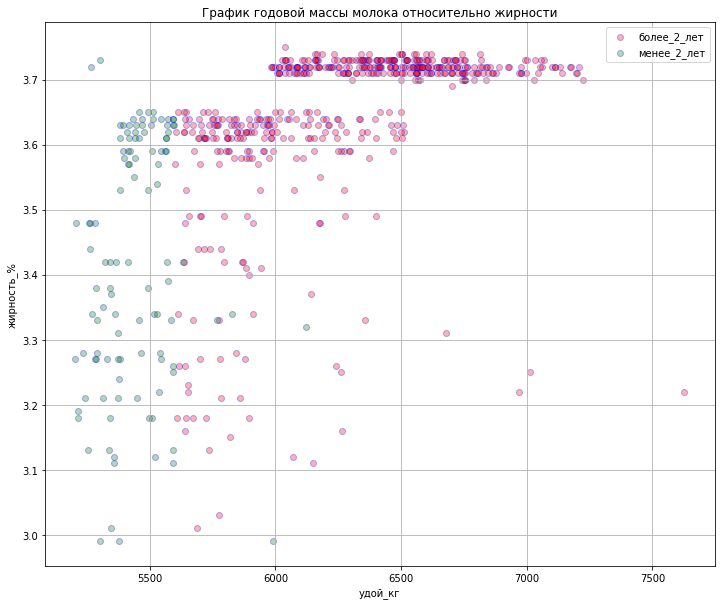

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'более_2_лет', 'более_2_лет'], ['green', 'менее_2_лет', 'менее_2_лет']:
    y = df1[df1['возраст'] == row]['жирность_%']
    x = df1[df1['возраст'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('жирность_%')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно жирности')
plt.grid(True)
plt.show()

Повышенная годовая масса молока у возраста 'более_2_лет'. Линейная зависимость прослеживается у коров возрастом более 2 лет, коровы возрастом менее 2 лет производят годовую массу молока ~5500 вне зависимости от жирности, корриляции не прослеживается

In [ ]:
df1[df1['возраст'] == "менее_2_лет"]['удой_кг'].mean()

5444.245454545455

In [ ]:
df1[df1['возраст'] == "менее_2_лет"]['удой_кг'].corr(df1[df1['возраст'] == "менее_2_лет"]['жирность_%'])

0.09836910744740439

### Годовая масса молока относително спо

In [ ]:
df1.columns

Index(['id', 'удой_кг', 'эке(энергетическая кормовая единица)',
       'сырой_протеин_г', 'спо(сахаро-протеиновое соотношение)', 'порода',
       'тип_пастбища', 'порода_папы-быка', 'жирность_%', 'белок_%',
       'вкус_молока', 'возраст', 'удой_category'],
      dtype='object')

In [ ]:
df1.groupby('удой_category')['спо(сахаро-протеиновое соотношение)'].agg(['count', 'mean', 'median'])

,count,mean,median
удой_category,,,
"(5203.999, 5652.4]",126,0.874683,0.88
"(5652.4, 5988.2]",126,0.880714,0.89
"(5988.2, 6281.6]",125,0.933280,0.94
"(6281.6, 6564.0]",128,0.937656,0.94
"(6564.0, 7626.0]",124,0.939435,0.94


In [ ]:
df1['удой_кг'].corr(df1['спо(сахаро-протеиновое соотношение)'])

0.8024721567672415

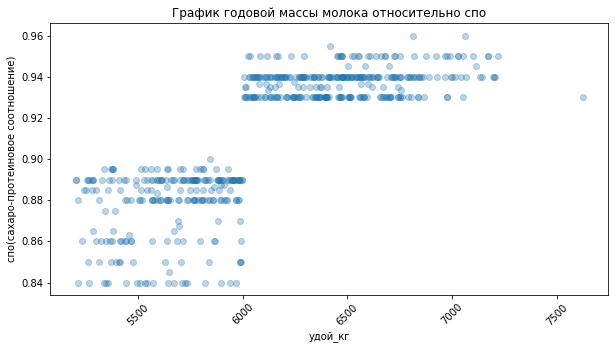

In [ ]:
df1.groupby('удой_кг')['спо(сахаро-протеиновое соотношение)'].mean().plot(figsize = [10, 5], style='o',
                                                                          alpha=0.3, rot=45,
                                                                          ylabel='спо(сахаро-протеиновое соотношение)',
                                                                          title = 'График годовой массы молока относительно спо'
                                                                         ).legend = False

Наблюдаем высокий коэффицент корриляции Пирсона (0.8), чем больше сахаро-протеиновое соотношение тем больше годовая масса молока. По графику видим что при годовой массе молока равной 5200-6000 спо соответствует 0.88-0.89, после чего наблюдаем резкое повышения спо 0.94 при годовой массе 6000-7600

Построим диаграмму рассеяния для текущего признака где цвет точек диаграммы отображает признак

#### Цветовой маркер признака 'порода'

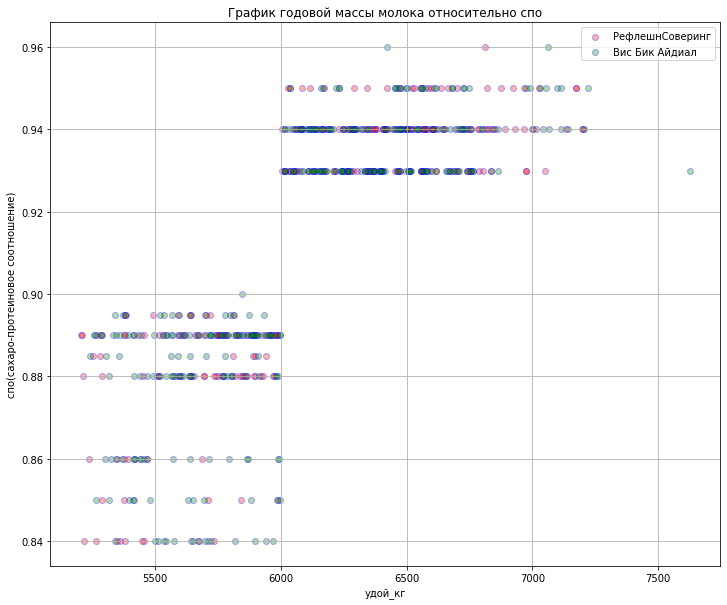

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'РефлешнСоверинг', 'РефлешнСоверинг'], ['green', 'Вис Бик Айдиал', 'Вис Бик Айдиал']:
    y = df1[df1['порода'] == row]['спо(сахаро-протеиновое соотношение)']
    x = df1[df1['порода'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('спо(сахаро-протеиновое соотношение)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно спо')
plt.grid(True)
plt.show()

Распределяется вне зависимо от порода. Цветовой маркер случаен

#### Цветовой маркер признака 'тип_пастбища'

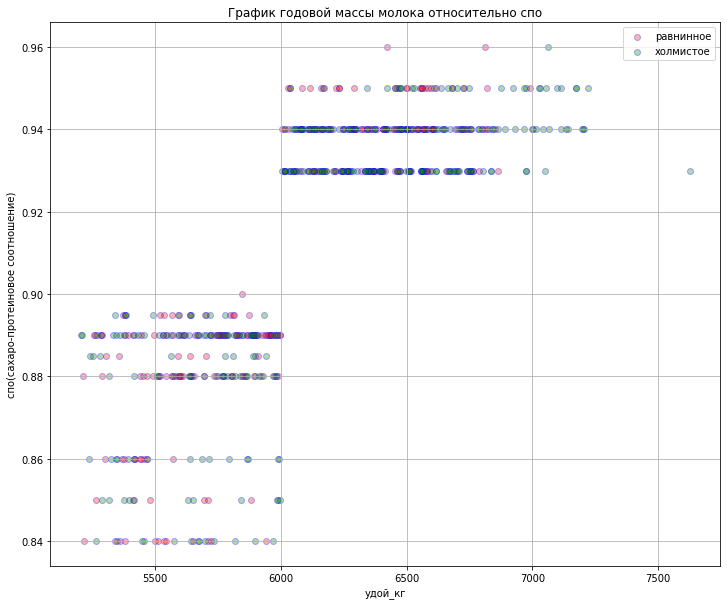

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'равнинное', 'равнинное'], ['green', 'холмистое', 'холмистое']:
    y = df1[df1['тип_пастбища'] == row]['спо(сахаро-протеиновое соотношение)']
    x = df1[df1['тип_пастбища'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('спо(сахаро-протеиновое соотношение)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно спо')
plt.grid(True)
plt.show()

Наблюдается чуть повышенная годовая масса молока у типа пастбища 'холмистое'. Корреляция прослеживается вне зависимости от типа пастбища

#### Цветовой маркер признака 'порода_папы-быка'

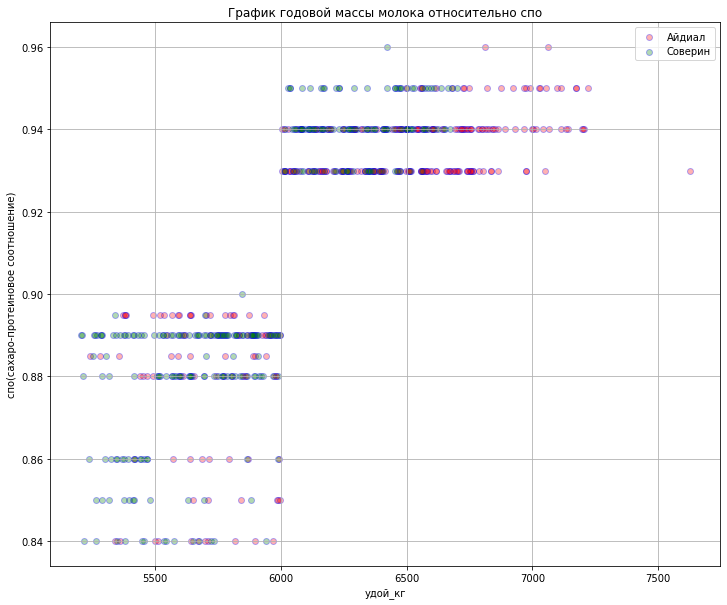

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'Айдиал', 'Айдиал'], ['green', 'Соверин', 'Соверин']:
    y = df1[df1['порода_папы-быка'] == row]['спо(сахаро-протеиновое соотношение)']
    x = df1[df1['порода_папы-быка'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('спо(сахаро-протеиновое соотношение)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно спо')
plt.grid(True)
plt.show()

Наблюдается чуть повышенная годовая масса молока у порода папы-быка 'Айдиал'. Корреляция прослеживается вне зависимости от породы папы-быка

#### Цветовой маркер признака 'вкус_молока'

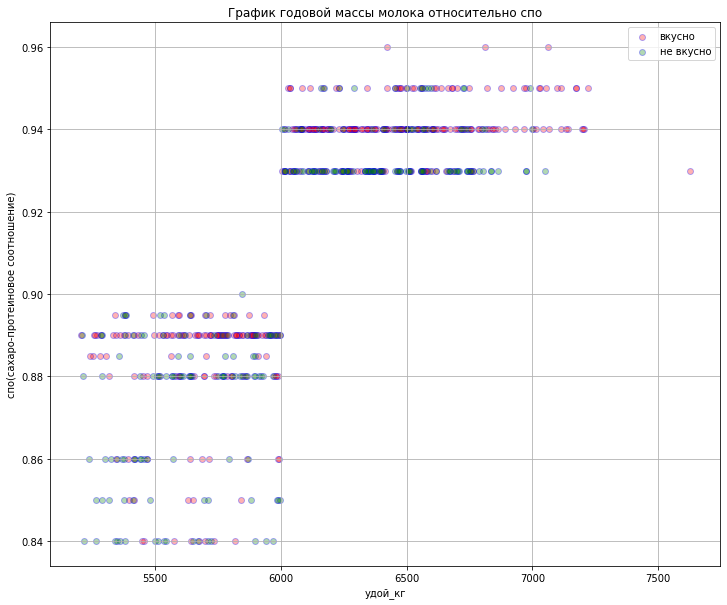

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'вкусно', 'вкусно'], ['green', 'не вкусно', 'не вкусно']:
    y = df1[df1['вкус_молока'] == row]['спо(сахаро-протеиновое соотношение)']
    x = df1[df1['вкус_молока'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('спо(сахаро-протеиновое соотношение)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно спо')
plt.grid(True)
plt.show()

Наблюдается повышенное сахаро-протеиновое соотношение у вкусного молока при одном уровне годовой массы молока. Корреляция прослеживается вне зависимости от вкуса молока

#### Цветовой маркер признака 'возраст'

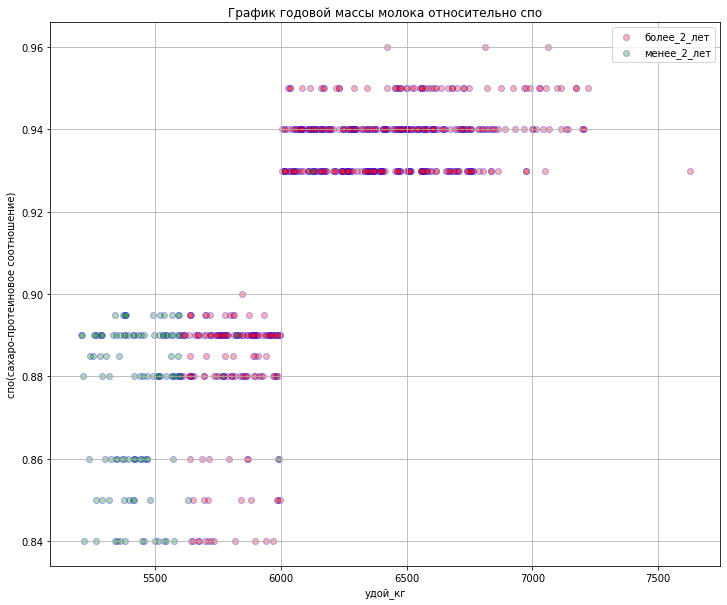

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'более_2_лет', 'более_2_лет'], ['green', 'менее_2_лет', 'менее_2_лет']:
    y = df1[df1['возраст'] == row]['спо(сахаро-протеиновое соотношение)']
    x = df1[df1['возраст'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('спо(сахаро-протеиновое соотношение)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно спо')
plt.grid(True)
plt.show()

Наблюдается повышенная годовая масса молока у возраста коров 'более_2_лет'. Линейная зависимость прослеживается у коров возрастом более 2 лет. Коровы возрастом менее 2 лет производят годовую массу молока ~5500 вне зависимости от спо, корриляции не прослеживается

In [ ]:
df1[df1['возраст'] == "менее_2_лет"]['удой_кг'].corr(df1[df1['возраст'] == "менее_2_лет"]
                                                     ['спо(сахаро-протеиновое соотношение)'])

0.18692917515121987

### Годовая масса молока относително эке

In [ ]:
df1.groupby('удой_category')['эке(энергетическая кормовая единица)'].agg(['count', 'mean', 'median'])

,count,mean,median
удой_category,,,
"(5203.999, 5652.4]",126,13.017460,12.9
"(5652.4, 5988.2]",126,13.837302,13.8
"(5988.2, 6281.6]",125,14.800000,14.8
"(6281.6, 6564.0]",128,15.364844,15.5
"(6564.0, 7626.0]",124,15.707258,15.7


In [ ]:
df1['удой_кг'].corr(df1['эке(энергетическая кормовая единица)'])

0.7442090236653971

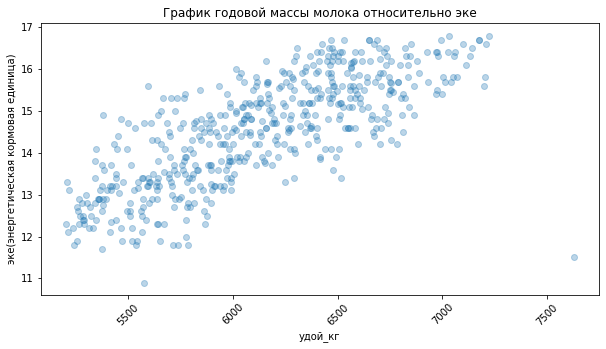

In [ ]:
df1.groupby('удой_кг')['эке(энергетическая кормовая единица)'].mean().plot(figsize = [10, 5], style='o',
                                                                           alpha=0.3, rot=45,
                                                                           ylabel='эке(энергетическая кормовая единица)',
                                                                           title = 'График годовой массы молока относительно эке'
                                                                           ).legend = False

Наблюдаем высокий коэффицент корриляции Пирсона (0.74), чем больше энергетическая кормовая единица тем больше годовая масса молока. По диаграмме видим линейный тренд на повышение

Построим диаграмму рассеяния для текущего признака где цвет точек диаграммы отображает признак

#### Цветовой маркер признака 'порода'

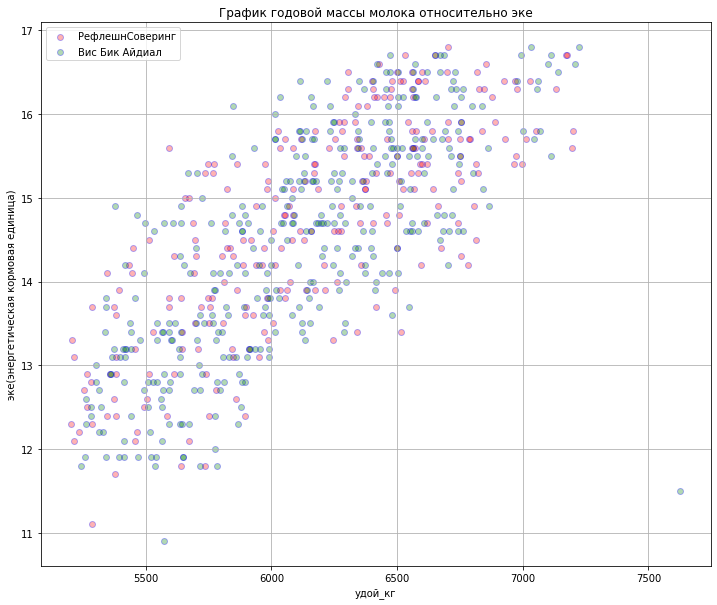

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'РефлешнСоверинг', 'РефлешнСоверинг'], ['green', 'Вис Бик Айдиал', 'Вис Бик Айдиал']:
    y = df1[df1['порода'] == row]['эке(энергетическая кормовая единица)']
    x = df1[df1['порода'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('эке(энергетическая кормовая единица)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно эке')
plt.grid(True)
plt.show()

Распределяется вне зависимо от породы. Цветовой маркер случаен

#### Цветовой маркер признака 'тип_пастбища'

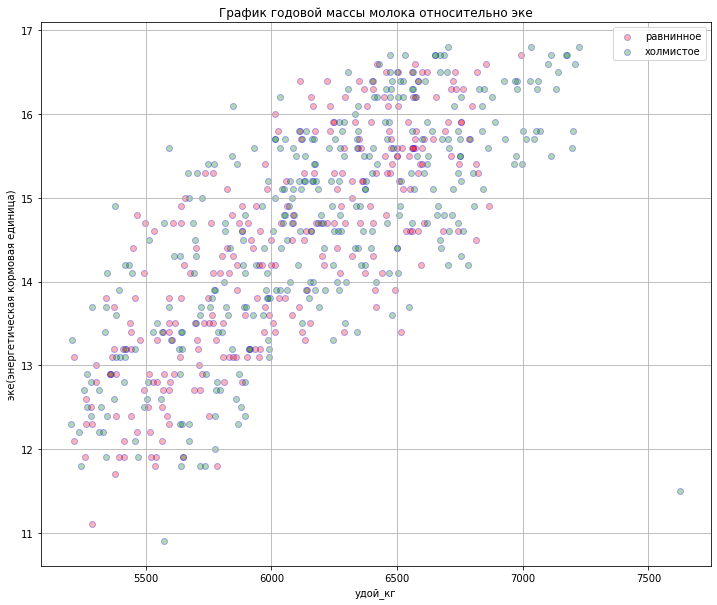

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'равнинное', 'равнинное'], ['green', 'холмистое', 'холмистое']:
    y = df1[df1['тип_пастбища'] == row]['эке(энергетическая кормовая единица)']
    x = df1[df1['тип_пастбища'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('эке(энергетическая кормовая единица)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно эке')
plt.grid(True)
plt.show()

Распределяется вне зависимо от порода. Цветовой маркер случаен

#### Цветовой маркер признака 'порода_папы-быка'

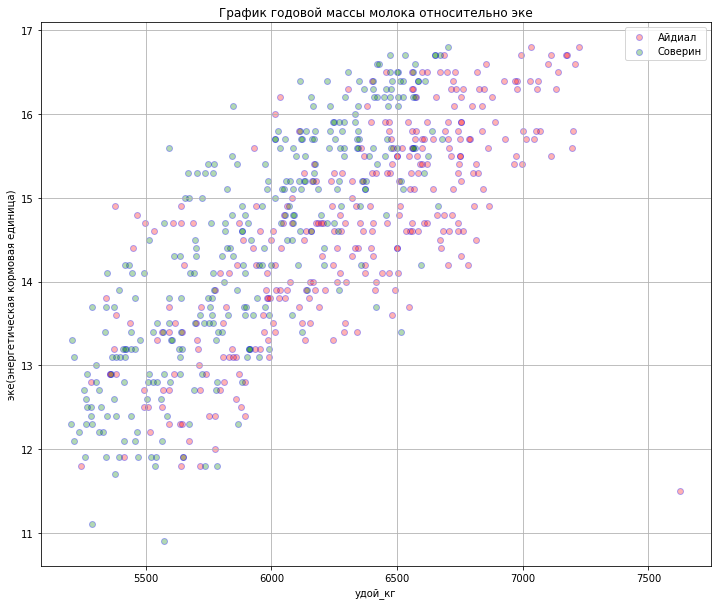

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'Айдиал', 'Айдиал'], ['green', 'Соверин', 'Соверин']:
    y = df1[df1['порода_папы-быка'] == row]['эке(энергетическая кормовая единица)']
    x = df1[df1['порода_папы-быка'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('эке(энергетическая кормовая единица)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно эке')
plt.grid(True)
plt.show()

Наблюдается чуть повышенная годовая масса молока у порода папы-быка 'Айдиал'. Корреляция прослеживается вне зависимости от породы папы-быка

#### Цветовой маркер признака 'вкус_молока'

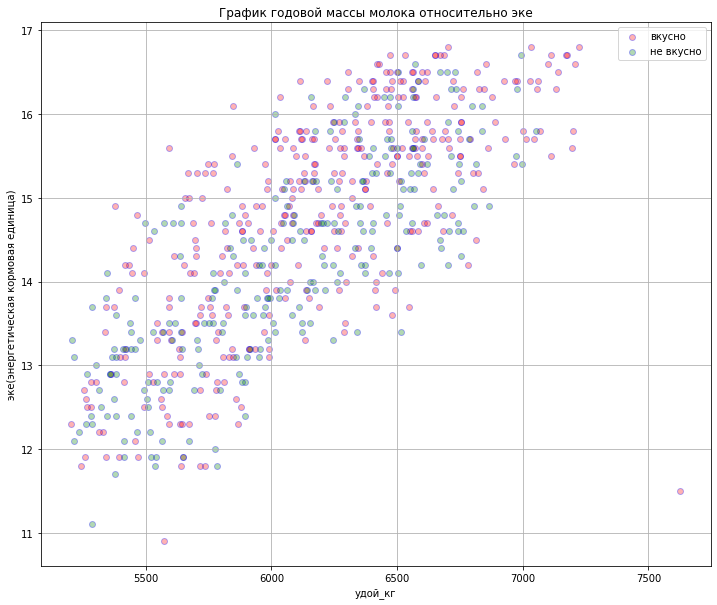

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'вкусно', 'вкусно'], ['green', 'не вкусно', 'не вкусно']:
    y = df1[df1['вкус_молока'] == row]['эке(энергетическая кормовая единица)']
    x = df1[df1['вкус_молока'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('эке(энергетическая кормовая единица)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно эке')
plt.grid(True)
plt.show()

Распределяется вне зависимо от порода. Цветовой маркер случаен

#### Цветовой маркер признака 'возраст'

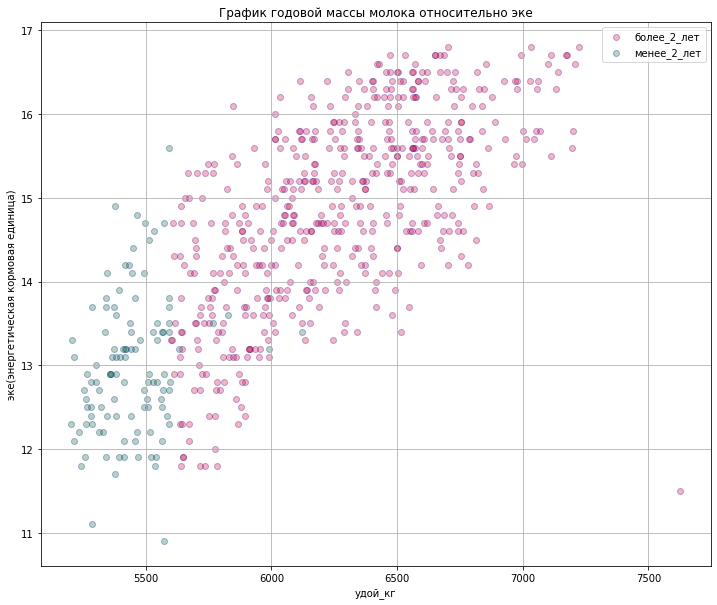

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for color, row, leg in ['red', 'более_2_лет', 'более_2_лет'], ['green', 'менее_2_лет', 'менее_2_лет']:
    y = df1[df1['возраст'] == row]['эке(энергетическая кормовая единица)']
    x = df1[df1['возраст'] == row]['удой_кг']
    plt.scatter(x, y, c=color, alpha=0.3, edgecolors='blue', label=leg)

plt.xlabel('удой_кг')
plt.ylabel('эке(энергетическая кормовая единица)')
plt.legend(loc="best")
plt.title('График годовой массы молока относительно эке')
plt.grid(True)
plt.show()

Наблюдается повышенная годовая масса молока у возраста коров 'более_2_лет'. Линейная зависимость прослеживается у коров возрастом более 2 лет. Коровы возрастом менее 2 лет производят годовую массу молока ~5500 вне зависимости от эке, корриляции не прослеживается

In [ ]:
df1[df1['возраст'] == "менее_2_лет"]['удой_кг'].corr(df1[df1['возраст'] == "менее_2_лет"]
                                                     ['эке(энергетическая кормовая единица)'])

0.222662776726509

## Обучение модели линейной регрессии

### 1-ая модель

Выделим в отдельный фрейм 'фичи' и целевую переменную, разделим данные на тренировочные и тестовые в соотношении 3:1

In [ ]:
df1.columns

Index(['id', 'удой_кг', 'эке(энергетическая кормовая единица)',
       'сырой_протеин_г', 'спо(сахаро-протеиновое соотношение)', 'порода',
       'тип_пастбища', 'порода_папы-быка', 'жирность_%', 'белок_%',
       'вкус_молока', 'возраст', 'удой_category'],
      dtype='object')

In [ ]:
X = df1.drop('удой_кг', axis=1)
y = df1['удой_кг']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Обазначим в переменные количественные и категориальные признаки

In [ ]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы-быка', 'возраст']
num_col_names = ['эке(энергетическая кормовая единица)',
                 'сырой_протеин_г',
                 'спо(сахаро-протеиновое соотношение)',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

обучение модели и получение предсказаний на тестовых данных

In [ ]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_1 = model_lr.predict(X_test)

расчет остатков

In [ ]:
residuals_1 = y_test - predictions_1

графики по количественным признакам — гистограмму частотности
распределение и диаграмма рассеяния

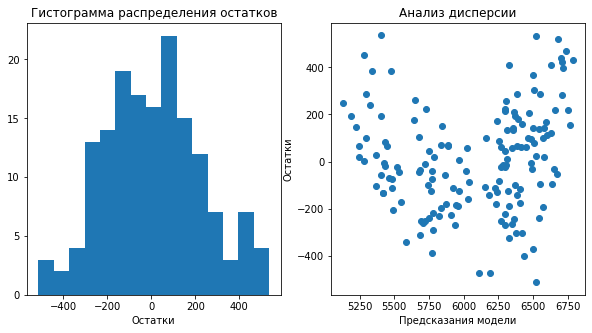

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_1, bins=15)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_1, y=residuals_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Гистограмма остатков ~распределена нормально без смещений. На диаграмме рассеяния маленькая и большая дисперсии остатков чередуются, что нам говорит о не лучшем качестве модели. Можно попробывать найти и добавить в модель дополнительные признаки. Скорее всего, на этапе сбора данных не учли какие-то признаки


Метрики качества модели:

In [ ]:
mse_1 = mean_squared_error(y_test, predictions_1)
mse_1

48227.787437263905

In [ ]:
rmse_1 = mean_squared_error(y_test, predictions_1, squared=False)
rmse_1

219.60825903700413

In [ ]:
mae_1 = mean_absolute_error(y_test, predictions_1)
mae_1

176.45397536291702

В среднем модель 'промахивается' на 176 кг годовой массы молока

In [ ]:
r2_1 = r2_score(y_test, predictions_1)
r2_1

0.8239963383122981

Значение коэффициента детерминации близко к единице — модель показывает результат в 82.3 процентах случаев лучше чем среднее арифметическое

### 2-ая модель

СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

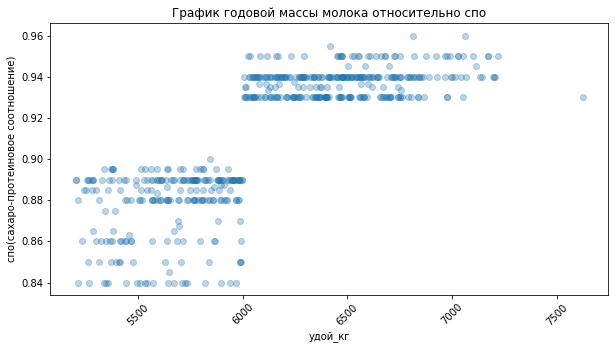

In [ ]:
df1.groupby('удой_кг')['спо(сахаро-протеиновое соотношение)'].mean().plot(figsize = [10, 5], style='o',
                                                                          alpha=0.3, rot=45,
                                                                          ylabel='спо(сахаро-протеиновое соотношение)',
                                                                          title = 'График годовой массы молока относительно спо'
                                                                         ).legend = False

In [ ]:
df1['спо_cat'] = df1['спо(сахаро-протеиновое соотношение)'].apply(lambda x: 'более 0.92' if x > 0.92 else 'менее 0.92')

In [ ]:
df1['спо_cat'].unique()

array(['менее 0.92', 'более 0.92'], dtype=object)

ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате

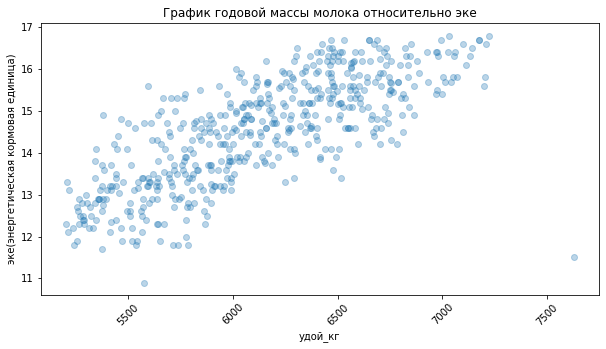

In [ ]:
df1.groupby('удой_кг')['эке(энергетическая кормовая единица)'].mean().plot(figsize = [10, 5], style='o',
                                                                           alpha=0.3, rot=45,
                                                                           ylabel='эке(энергетическая кормовая единица)',
                                                                           title = 'График годовой массы молока относительно эке'
                                                                           ).legend = False

In [ ]:
df1['эке**2'] = df1['эке(энергетическая кормовая единица)'].apply(lambda x: x**2)

In [ ]:
df1[['эке(энергетическая кормовая единица)', 'эке**2']].head()

,эке(энергетическая кормовая единица),эке**2
0,14.2,201.64
1,12.8,163.84
2,14.0,196.00
3,12.4,153.76
4,12.8,163.84


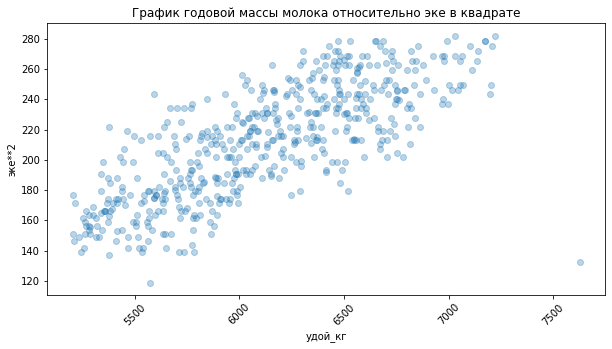

In [ ]:
df1.groupby('удой_кг')['эке**2'].mean().plot(figsize = [10, 5], style='o',
                                                                           alpha=0.3, rot=45,
                                                                           ylabel='эке**2',
                                                                           title = 'График годовой массы молока относительно эке в квадрате'
                                                                           ).legend = False

In [ ]:
df1['удой_кг'].corr(df1['эке**2'])

0.7459652791285718

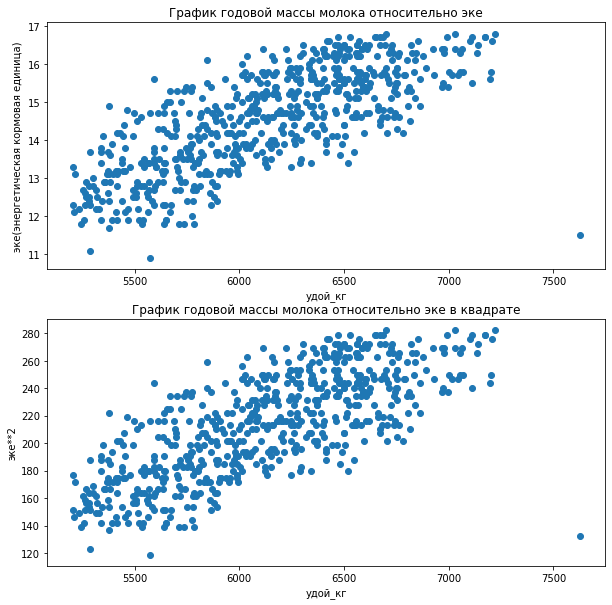

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
axes[0].scatter(x=df1['удой_кг'], y=df1['эке(энергетическая кормовая единица)'])
axes[0].set_title('График годовой массы молока относительно эке')
axes[0].set_xlabel('удой_кг')
axes[0].set_ylabel('эке(энергетическая кормовая единица)')

axes[1].scatter(x=df1['удой_кг'], y=df1['эке**2'])
axes[1].set_xlabel('удой_кг')
axes[1].set_ylabel('эке**2')
axes[1].set_title('График годовой массы молока относительно эке в квадрате')
plt.show()

Виднеется легкое выпрямление тренда

Выделим в отдельный фрейм 'фичи' и целевую переменную, разделим данные на тренировочные и тестовые в соотношении 3:1

In [ ]:
X = df1.drop('удой_кг', axis=1)
y = df1['удой_кг']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Обазначим в переменные количественные и категориальные признаки с учетов новосозданных признаков

In [ ]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat']
num_col_names = ['эке**2',
                 'сырой_протеин_г',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

обучение модели и получение предсказаний на тестовых данных

In [ ]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_2 = model_lr.predict(X_test)

расчет остатков

In [ ]:
residuals_2 = y_test - predictions_2

графики по количественным признакам — гистограмму частотности
распределение и диаграмма рассеяния

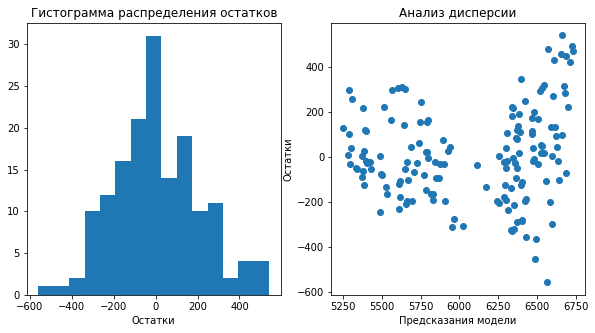

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2, bins=15)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_2, y=residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Гистограмма остатков ~распределена нормально без смещений. На диаграмме рассеяния: маленькая и большая дисперсии остатков чередуются;  на одном участке разброс значений остатков сильно больше, чем на другом, начинает виднеться «рупор»

Метрики качества модели:

In [ ]:
mse_2 = mean_squared_error(y_test, predictions_2)
mse_2

41794.14061856384

In [ ]:
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
rmse_2

204.43615291470303

In [ ]:
mae_2 = mean_absolute_error(y_test, predictions_2)
mae_2

159.6271089420484

В среднем модель 'промахивается' на 159 кг годовой массы молока

In [ ]:
r2_2 = r2_score(y_test, predictions_2)
r2_2

0.84747544565409

Значение коэффициента детерминации близко к единице — модель показывает результат в 84.7 процентах случаев лучше чем среднее арифметическое

После преобразования СПО в бинарный категориальный признак и ввода нового признака ЭКЕ в квадрате наблюдаем улучшение модели

### 3-я модель

In [ ]:
df2.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Добавим в df1 переменную 'имя_папы' из df2 для использованния этой колонки в обучении модели, сопряжение будем производить по столбцу 'id'

In [ ]:
df1 = df1.merge(df2,on='id', how='outer')

Выделим в отдельный фрейм 'фичи' и целевую переменную, разделим данные на тренировочные и тестовые в соотношении 3:1

In [ ]:
X = df1.drop('удой_кг', axis=1)
y = df1['удой_кг']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Обазначим в переменные количественные и категориальные признаки с учетов добавленного признака

In [ ]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat', 'имя_папы']
num_col_names = ['эке**2',
                 'сырой_протеин_г',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

обучение модели и получение предсказаний на тестовых данных

In [ ]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_3 = model_lr.predict(X_test)
model_lr.coef_

array([  25.68345969,   66.16524769,    3.96509674, -211.39798083,
       -400.63873167,  259.63119395,  252.15982146,   50.04662303,
        119.54951285,   41.64022729,   11.52968366,  -22.19119024])

расчет остатков

In [ ]:
residuals_3 = y_test - predictions_3
X_train

,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_менее_2_лет,x4_менее 0.92,x5_Буйный,x5_Геркулес,x5_Соловчик,эке**2,сырой_протеин_г,жирность_%,белок_%
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.027210,0.248479,0.199205,1.666305
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.053583,-1.392310,-2.618012,1.283462
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.027210,1.124306,0.076717,0.517774
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.172927,0.858232,0.199205,0.134930
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.549923,-0.671693,0.566668,-2.162133
...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.879535,0.946924,0.015473,1.283462
467,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.100407,-0.411162,-0.229502,0.134930
468,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.344867,1.562220,0.811643,1.283462
469,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.891846,-0.350187,0.627912,1.666305


графики по количественным признакам — гистограмму частотности
распределение и диаграмма рассеяния

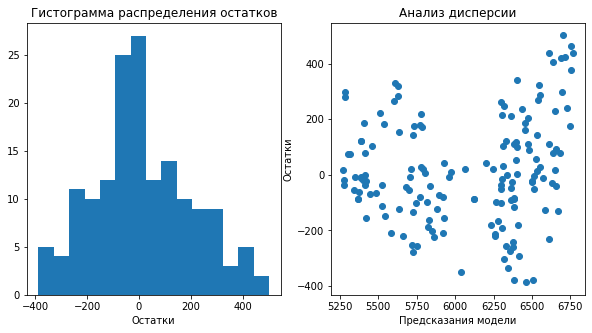

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3, bins=15)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_3, y=residuals_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Гистограмма остатков ~распределена нормально c небольшим смещением вправо. На диаграмме рассеяния: маленькая и большая дисперсии остатков чередуются;  на одном участке разброс значений остатков больше, чем на другом, начинает виднеться «рупор»

Метрики качества модели:

In [ ]:
mse_3 = mean_squared_error(y_test, predictions_3)
mse_3

36486.32008697209

In [ ]:
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)
rmse_3

191.01392642153633

In [ ]:
mae_3 = mean_absolute_error(y_test, predictions_3)
mae_3

149.4901314105672

В среднем модель 'промахивается' на 149 кг годовой массы молока

In [ ]:
r2_3 = r2_score(y_test, predictions_3)
r2_3

0.8668459351329314

Значение коэффициента детерминации близко к единице — модель показывает результат в 86.6 процентах случаев лучше чем среднее арифметическое

Наблюдается улучшение качества модели при добавления нового признака 'имя_папы'

### Выбор модели

Создадим для наглядности таблицу с метриками качества относительно каждой модели

In [ ]:
metrics = {'mse': [mse_1, mse_2, mse_3],
        'rmse': [rmse_1, rmse_2, rmse_3],
        'mae': [mae_1, mae_2, mae_3],
        'r2': [r2_1, r2_2, r2_3]}
model = ['1_model', '2_model', '3_model']
metrics_model = pd.DataFrame(data=metrics, index=model)

In [ ]:
metrics_model

,mse,rmse,mae,r2
1_model,48227.787437,219.608259,176.453975,0.823996
2_model,41794.140619,204.436153,159.627109,0.847475
3_model,36486.320087,191.013926,149.490131,0.866846


Исходя из метрик качества 3-я модель выглядит предпочтительней (коэффициент детерминации максимально приближен к еденице, мсе-рмсе-мае показывают минимальную ошибку в сравнении с 2-мя другими моделями)

Посмотрим еще раз на остатки по всем 3-ем моделям и сравним их:

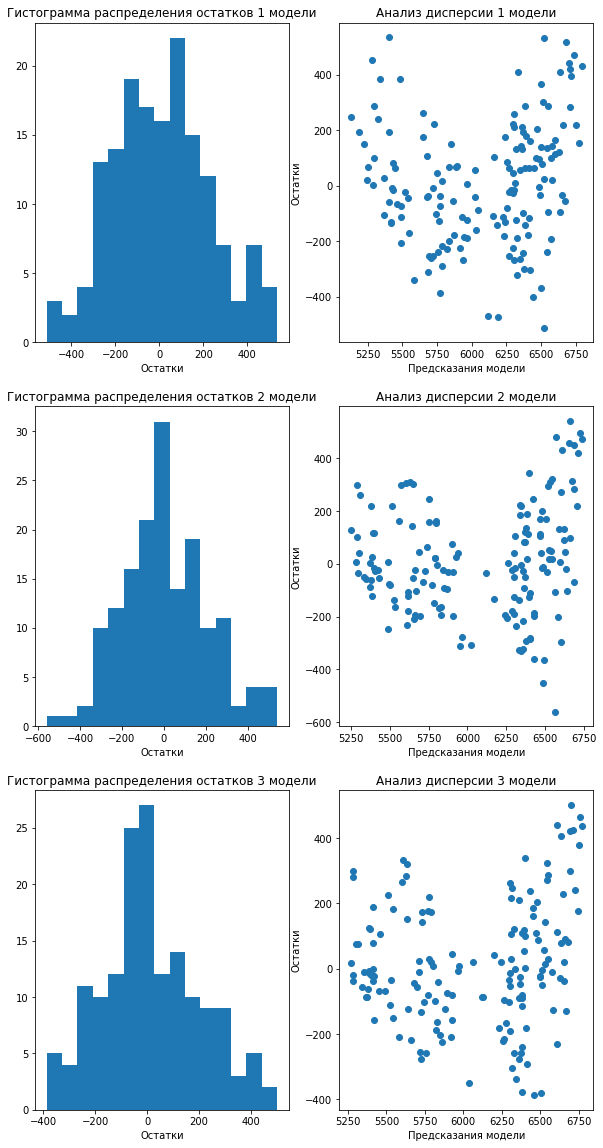

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,20))
axes[0, 0].hist(residuals_1, bins=15)
axes[0, 0].set_title('Гистограмма распределения остатков 1 модели')
axes[0, 0].set_xlabel('Остатки')

axes[0, 1].scatter(x=predictions_1, y=residuals_1)
axes[0, 1].set_xlabel('Предсказания модели')
axes[0, 1].set_ylabel('Остатки')
axes[0, 1].set_title('Анализ дисперсии 1 модели')

axes[1, 0].hist(residuals_2, bins=15)
axes[1, 0].set_title('Гистограмма распределения остатков 2 модели')
axes[1, 0].set_xlabel('Остатки')

axes[1, 1].scatter(x=predictions_2, y=residuals_2)
axes[1, 1].set_xlabel('Предсказания модели')
axes[1, 1].set_ylabel('Остатки')
axes[1, 1].set_title('Анализ дисперсии 2 модели')

axes[2, 0].hist(residuals_3, bins=15)
axes[2, 0].set_title('Гистограмма распределения остатков 3 модели')
axes[2, 0].set_xlabel('Остатки')

axes[2, 1].scatter(x=predictions_3, y=residuals_3)
axes[2, 1].set_xlabel('Предсказания модели')
axes[2, 1].set_ylabel('Остатки')
axes[2, 1].set_title('Анализ дисперсии 3 модели')

plt.show()

Глядя на распределения по 3 моделям можно сказать что 2-я модель реже ошибается чем 1-ая, но промахи в численном эквиваленте встречаются больше, 3-я модель меньше промахивается чем 1-ая в то же время промахи у нее не такие критичные как 2 2-ой модели. Анализ дисперсии показал что у 2-3 моделей есть «рупор» на одном участке разброс значений остатков больше, чем на другом; у всех моделей маленькая и большая дисперсии остатков чередуются

Исходя из оценки метрик и анализа остатков 3-я модель выглядит предпочтительней для получения прогноза удоя коров 'cow_buy.csv' сохраненного в df3

In [ ]:
st.t.interval(alpha=0.95, df=len(residuals_3)-1, loc=np.mean(residuals_3), scale=st.sem(residuals_3))

(-14.262098933147744, 45.75475287185199)

Доверительный интервал прогноза модели (-14 : 45) с вероятностью 95%

In [ ]:
st.t.interval(alpha=0.99, df=len(residuals_3)-1, loc=np.mean(residuals_3), scale=st.sem(residuals_3))

(-23.868696381636017, 55.361350320340264)

Доверительный интервал прогноза модели (-23 : 55) с вероятностью 99%

In [ ]:
st.t.interval(alpha=0.95, df=len(predictions_3)-1, loc=np.mean(predictions_3), scale=st.sem(residuals_3))

(6040.776892697769, 6100.793744502768)

### Прогноз удоя коров

Подготовим данные для прогназирования удоя коров, которых фермер хочет купить:

In [ ]:
df_predict = df3.copy()

Переименнуем колонки в понятные для модели

In [ ]:
df_predict = df_predict.rename(columns={'текущая_жирность_%': 'жирность_%', 'текущий_белок_%':'белок_%'})

Добавление недостающих признаков ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) средние значения каждого из которых увеличенно на 5% по условию 'технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%'

In [ ]:
df_predict['эке**2'] = (df1['эке(энергетическая кормовая единица)'].mean()*1.05)**2

In [ ]:
df_predict['сырой_протеин_г'] = df1['сырой_протеин_г'].mean()*1.05

In [ ]:
df_predict['спо'] = df1['спо(сахаро-протеиновое соотношение)'].mean()*1.05

In [ ]:
df_predict['спо_cat'] = df_predict['спо'].apply(lambda x: 'более 0.92' if x > 0.92 else 'менее 0.92')

In [ ]:
df_predict

,порода,тип_пастбища,порода_папы-быка,имя_папы,жирность_%,белок_%,возраст,эке**2,сырой_протеин_г,спо,спо_cat
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.205675,2019.532273,0.958772,более 0.92
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.205675,2019.532273,0.958772,более 0.92
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.205675,2019.532273,0.958772,более 0.92
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,233.205675,2019.532273,0.958772,более 0.92


Создание обучающей выборки взятого из df1, выделение целевой переменной 'удой_кг' и сохранения подготовленного фрейма df_predict в X_test для получения предсказания

In [ ]:
X_train = df1.drop('удой_кг', axis=1)
y_train = df1['удой_кг']
X_test = df_predict

Обазначим в переменные количественные и категориальные признаки для предсказания как у 'лучшей' 3-ей модели

In [ ]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat', 'имя_папы']
num_col_names = ['эке**2',
                 'сырой_протеин_г',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

обучение модели и получение предсказаний на тестовых данных

In [ ]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

Сохраним результат предсказания в колонке 'pred_удой_кг' df3 исходного по файлу cow_buy.csv-данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой

In [ ]:
df3['pred_удой_кг'] = predictions
df3

,порода,тип_пастбища,порода_папы-быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,pred_удой_кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6583.611873
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6251.742101
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6288.830193
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6711.753544
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6546.224943
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6563.875609
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6490.391675
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6319.154267
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6575.881725
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6594.039438


## Обучение модели логистической регрессии

### 1-ая модель

Выделим в отдельный фрейм 'фичи' и целевую переменную, разделим данные на тренировочные и тестовые в соотношении 3:1

In [ ]:
X = df1.drop('вкус_молока', axis=1)
y = df1['вкус_молока']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Обазначим в переменные количественные и категориальные признаки

In [ ]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы-быка', 'возраст']
num_col_names = ['эке(энергетическая кормовая единица)',
                 'сырой_протеин_г',
                 'спо(сахаро-протеиновое соотношение)',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучение модели и получение предсказаний на тестовых данных

In [ ]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Расчет accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.6392405063291139

In [ ]:
(1 - acc) * 100

36.07594936708861

Модель ошибается в 36 % случаев

In [ ]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")

x0_РефлешнСоверинг  : +0.084419
x1_холмистое        : -0.576009
x2_Соверин          : -0.346447
x3_менее_2_лет      : -0.013976
эке(энергетическая кормовая единица): -0.280746
сырой_протеин_г     : -0.156644
спо(сахаро-протеиновое соотношение): -0.244284
жирность_%          : +0.162353
белок_%             : -0.149330


Будем считать что значения молока как 'вкусно' будет являтся обьектом отрицательного класса ('negative')

In [ ]:
y_test.value_counts()


вкусно       97
не вкусно    61
Name: вкус_молока, dtype: int64

Text(0.5, 15.0, 'Predicted')

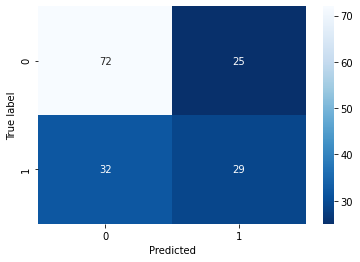

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Ошибка первого рода составляет: 25

Ошибка второго рода составляет: 32

Преобразуем тестовые и предсказанные моделью значения в 0 и 1 для применения функции расчета метрик

In [ ]:
y_test_bi = y_test.apply(lambda x: 0 if x == 'вкусно' else 1)
y_pred_bi = pd.Series(y_pred).apply(lambda x: 0 if x == 'вкусно' else 1)

In [ ]:
recall = recall_score(y_test_bi, y_pred_bi)
precision = precision_score(y_test_bi, y_pred_bi)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.475
precision:  0.537


По условию 'главное для заказчика — вкусное молоко', делаем вывод что необходимо снизить ошибку второго рода (снизить промахи модели FN когда не вкусное молоко модель посчитало вкусным) и повысить recall

Перед тем как регулировать порог классификации необходимо добиться лучшего качества модели по метрике acc

### 2-ая модель

Выделим в отдельный фрейм 'фичи' и целевую переменную, разделим данные на тренировочные и тестовые в соотношении 3:1

In [ ]:
X = df1.drop('вкус_молока', axis=1)
y = df1['вкус_молока']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Обазначим в переменные количественные и категориальные признаки согласно 2-ой модели линейной регрессии

In [ ]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat']
num_col_names = ['эке**2',
                 'сырой_протеин_г',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучение модели и получение предсказаний на тестовых данных

In [ ]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Расчет accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.6708860759493671

In [ ]:
(1 - acc) * 100

32.91139240506329

Модель ошибается в 32.9 % случаев

In [ ]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")

x0_РефлешнСоверинг  : +0.103673
x1_холмистое        : -0.610651
x2_Соверин          : -0.113532
x3_менее_2_лет      : +0.152433
x4_менее 0.92       : -0.684636
эке**2              : -0.582240
сырой_протеин_г     : -0.234063
жирность_%          : +0.073079
белок_%             : -0.172959


Будем считать что значения молока как 'вкусно' будет являтся обьектом отрицательного класса ('negative')

In [ ]:
y_test.value_counts()


вкусно       97
не вкусно    61
Name: вкус_молока, dtype: int64

Text(0.5, 15.0, 'Predicted')

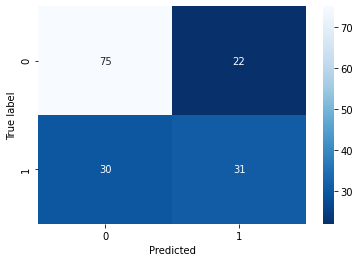

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Ошибка первого рода составляет: 22

Ошибка второго рода составляет: 30

Преобразуем тестовые и предсказанные моделью значения в 0 и 1 для применения функции расчета метрик

In [ ]:
y_test_bi = y_test.apply(lambda x: 0 if x == 'вкусно' else 1)
y_pred_bi = pd.Series(y_pred).apply(lambda x: 0 if x == 'вкусно' else 1)

In [ ]:
recall = recall_score(y_test_bi, y_pred_bi)
precision = precision_score(y_test_bi, y_pred_bi)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.508
precision:  0.585


### 3-я модель

Выделим в отдельный фрейм 'фичи' и целевую переменную, разделим данные на тренировочные и тестовые в соотношении 3:1

In [ ]:
X = df1.drop('вкус_молока', axis=1)
y = df1['вкус_молока']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Обазначим в переменные количественные и категориальные признаки согласно 3-ей модели линейной регрессии

In [ ]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat', 'имя_папы']
num_col_names = ['эке**2',
                 'сырой_протеин_г',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучение модели и получение предсказаний на тестовых данных

In [ ]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Расчет accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.6518987341772152

In [ ]:
(1 - acc) * 100

34.81012658227848

Модель ошибается в 34.8 % случаев

In [ ]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")

x0_РефлешнСоверинг  : +0.166312
x1_холмистое        : -0.591114
x2_Соверин          : -0.273962
x3_менее_2_лет      : +0.101403
x4_менее 0.92       : -0.669885
x5_Буйный           : +0.005274
x5_Геркулес         : -0.029945
x5_Соловчик         : +0.611937
эке**2              : -0.593302
сырой_протеин_г     : -0.265746
жирность_%          : +0.064357
белок_%             : -0.164936


Будем считать что значения молока как 'вкусно' будет являтся обьектом отрицательного класса ('negative')

In [ ]:
y_test.value_counts()


вкусно       97
не вкусно    61
Name: вкус_молока, dtype: int64

Text(0.5, 15.0, 'Predicted')

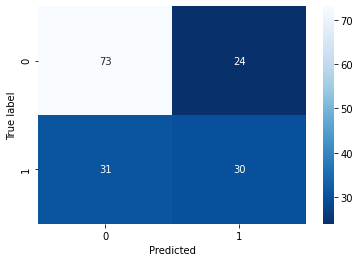

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Ошибка первого рода составляет: 24

Ошибка второго рода составляет: 31

Преобразуем тестовые и предсказанные моделью значения в 0 и 1 для применения функции расчета метрик

In [ ]:
y_test_bi = y_test.apply(lambda x: 0 if x == 'вкусно' else 1)
y_pred_bi = pd.Series(y_pred).apply(lambda x: 0 if x == 'вкусно' else 1)

In [ ]:
recall = recall_score(y_test_bi, y_pred_bi)
precision = precision_score(y_test_bi, y_pred_bi)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.492
precision:  0.556


### 4-ая модель

Выделим в отдельный фрейм 'фичи' и целевую переменную, разделим данные на тренировочные и тестовые в соотношении 3:1

In [ ]:
X = df1.drop('вкус_молока', axis=1)
y = df1['вкус_молока']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Методом перебора 'фич' были отобраны количественные и категориальные признаки, которые дают наилучший результат acc

In [ ]:
cat_col_names = ['возраст', 'спо_cat', 'имя_папы']
num_col_names = ['эке**2',
                 'сырой_протеин_г',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучение модели и получение предсказаний на тестовых данных

In [ ]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Расчет accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.689873417721519

In [ ]:
(1 - acc) * 100

31.0126582278481

Модель ошибается в 31 % случаев

In [ ]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}")

x0_менее_2_лет      : +0.130545
x1_менее 0.92       : -0.599946
x2_Буйный           : +0.267189
x2_Геркулес         : +0.302791
x2_Соловчик         : +0.646701
эке**2              : -0.595488
сырой_протеин_г     : -0.267933
жирность_%          : +0.102902
белок_%             : -0.215784


Будем считать что значения молока как 'вкусно' будет являтся обьектом отрицательного класса ('negative')

In [ ]:
y_test.value_counts()


вкусно       97
не вкусно    61
Name: вкус_молока, dtype: int64

Text(0.5, 15.0, 'Predicted')

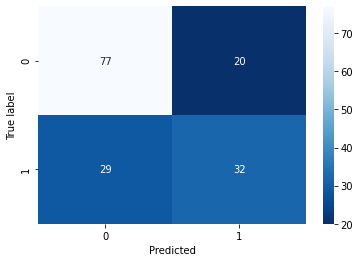

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Ошибка первого рода составляет: 20

Ошибка второго рода составляет: 29

Преобразуем тестовые и предсказанные моделью значения в 0 и 1 для применения функции расчета метрик

In [ ]:
y_test_bi = y_test.apply(lambda x: 0 if x == 'вкусно' else 1)
y_pred_bi = pd.Series(y_pred).apply(lambda x: 0 if x == 'вкусно' else 1)

In [ ]:
recall = recall_score(y_test_bi, y_pred_bi)
precision = precision_score(y_test_bi, y_pred_bi)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.525
precision:  0.615


### Регулировка порога классификации

Создадим расчётные столбцы с предсказаниями для порогов необходимых для увеличения recall

In [ ]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test_bi, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
thresholds = [round(i,2) for i in np.linspace(0.26,0.55,num = 4,endpoint=False)]
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0)

print(data.tail())

     y_valid   y_proba  y_pred_0.26  y_pred_0.33  y_pred_0.4  y_pred_0.48
17         0  0.154676            0            0           0            0
8          0  0.154441            0            0           0            0
85         0  0.140243            0            0           0            0
56         0  0.133521            0            0           0            0
135        1  0.113338            0            0           0            0


Наблюдаем что на самом низком значении пробы находится предсказание 'отрицательного класса'. Это нам говорит о том что значение в классе которого модель была максимально уверенна ошибочное и что нам не получится полностью избавится от ошибки FN, только если модель не будет считать все значения классом '1' то есть не вкусным молоком

Text(0.5, 15.0, 'Predicted')

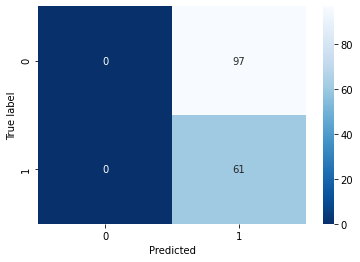

In [ ]:
y_pred_threshold = pd.Series(y_proba).apply(lambda x: 0 if x < 0.1 else 1)
y_pred_threshold = y_pred_threshold.apply(lambda x: 'вкусно' if x == 0 else 'не вкусно')
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

In [ ]:
acc = accuracy_score(y_test, y_pred_threshold)
acc

0.3860759493670886

In [ ]:
(1 - acc) * 100

61.392405063291136

Попробуем отыскать такие значения порога классификации которые будут минимизировать ошибку FN при этом не сильно проигрывать в acc

Взглянем графически на проблему:

In [ ]:
recall_l = []
threshold_l = []
fn_l = []
acc_l = []
for row in range(0, 101):
    y_pred_threshold = pd.Series(y_proba).apply(lambda x: 0 if x < round(row*0.01, 2) else 1)
    recall_l.append(recall_score(y_test_bi, y_pred_threshold)*100) # для удобства интерпретации на графике умножим коэффицент на 100
    y_pred_threshold = y_pred_threshold.apply(lambda x: 'вкусно' if x == 0 else 'не вкусно')
    acc = accuracy_score(y_test, y_pred_threshold)
    cm = confusion_matrix(y_test, y_pred_threshold)
    threshold_l.append(round(row*0.01, 2))
    fn_l.append(cm[1][0])
    acc_l.append((1 - acc) * 100)

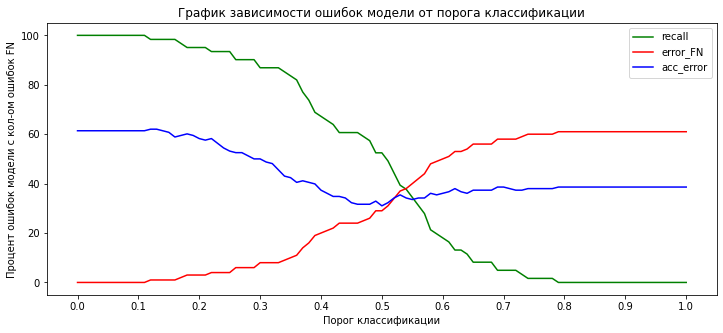

In [ ]:
x_ticks = [round(i*0.1, 1) for i in range(11)]
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(threshold_l, recall_l, label = 'recall', color = 'g')
plt.plot(threshold_l, fn_l, label = 'error_FN', color = 'r')
plt.plot(threshold_l, acc_l, label = 'acc_error', color = 'b')
plt.xlabel('Порог классификации')
plt.ylabel('Процент ошибок модели с кол-ом ошибок FN')
plt.title('График зависимости ошибок модели от порога классификации')
plt.legend(loc="best")
plt.xticks(ticks=x_ticks)
plt.show()

Можем прикинуть графически когда recall значимо повышается, нужный нам порог находится в диапазоне (0.35:0.39)

Text(0.5, 15.0, 'Predicted')

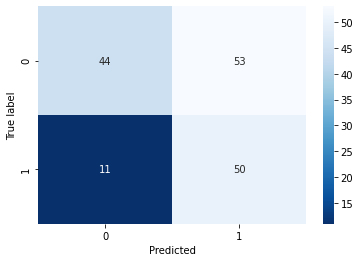

In [ ]:
y_pred_threshold = pd.Series(y_proba).apply(lambda x: 0 if x < 0.36 else 1)
y_pred_threshold = y_pred_threshold.apply(lambda x: 'вкусно' if x == 0 else 'не вкусно')
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

In [ ]:
acc = accuracy_score(y_test, y_pred_threshold)
acc

0.5949367088607594

In [ ]:
(1 - acc) * 100

40.50632911392405

Модель ошибается в 40.5 % случаев

In [ ]:
y_pred_threshold = pd.Series(y_proba).apply(lambda x: 0 if x < 0.36 else 1)

In [ ]:
recall = recall_score(y_test_bi, y_pred_threshold)
precision = precision_score(y_test_bi, y_pred_threshold)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.82
precision:  0.485


Был выбран порог классификации 0.36, который дает нам:

recall = 0.82

precision = 0.485

acc = 0.59

### Прогноз вкуса молока

In [ ]:
df_predict.head()

,порода,тип_пастбища,порода_папы-быка,имя_папы,жирность_%,белок_%,возраст,эке**2,сырой_протеин_г,спо,спо_cat
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.205675,2019.532273,0.958772,более 0.92
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.205675,2019.532273,0.958772,более 0.92
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.205675,2019.532273,0.958772,более 0.92


Создание обучающей выборки взятого из df1, выделение целивой переменной 'вкус молока' и сохранения подготовленного фрейма df_predict в X_test для получения предсказания

In [ ]:
X_train = df1.drop('вкус_молока', axis=1)
y_train = df1['вкус_молока']
X_test = df_predict

Обазначим в переменные количественные и категориальные признаки для предсказания как у 'лучшей' 4-ой модели

In [ ]:
cat_col_names = ['возраст', 'спо_cat', 'имя_папы']
num_col_names = ['эке**2',
                 'сырой_протеин_г',
                 'жирность_%',
                 'белок_%']

подготовка признаков (масштабирование и кодирование)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучение модели и получение предсказаний на тестовых данных

In [ ]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

вкусно       10
не вкусно     6
dtype: int64

Выставления порога классификации 0.36

In [ ]:
y_proba = clf.predict_proba(X_test)[:,1]
y_pred_threshold = pd.Series(y_proba).apply(lambda x: 0 if x < 0.36 else 1)
y_pred_threshold = y_pred_threshold.apply(lambda x: 'вкусно' if x == 0 else 'не вкусно')

In [ ]:
y_pred_threshold.value_counts()

не вкусно    11
вкусно        5
dtype: int64

Сохраним результат предсказания в колонке 'pred_вкус_молока' df3 исходного по файлу cow_buy.csv-данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой

In [ ]:
df3['pred_вкус_молока'] = y_pred_threshold
df3

,порода,тип_пастбища,порода_папы-быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,pred_удой_кг,pred_вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6583.611873,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6251.742101,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6288.830193,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6711.753544,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6546.224943,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6563.875609,не вкусно
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6490.391675,вкусно
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6319.154267,вкусно
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6575.881725,не вкусно
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6594.039438,не вкусно


## Итоговые выводы

Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко

In [ ]:
good_cows = df3[(df3['pred_вкус_молока'] == 'вкусно') & (df3['pred_удой_кг'] > 6000)]
good_cows

,порода,тип_пастбища,порода_папы-быка,имя_папы,текущая_жирность_%,текущий_белок_%,возраст,pred_удой_кг,pred_вкус_молока
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6251.742101,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6288.830193,вкусно
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6490.391675,вкусно
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6319.154267,вкусно
11,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,6095.071199,вкусно


Исходя из условий отбора фермер может купить c минимальным риском 5 коров. Полностью вероятность успешной покупки не получится достичь из за качества модели логистической регрессии (recall = 0.82) вероятность получить не вкусное молоко составляет 18%, модель линейной регрессии учитывая доверительный интервал предсказала годовую массу молока более 6000кг у данных коров с вероятностью выше 99%

Для улучшения модели логистической регрессии необходимо больше признаков с высокой корреляцией к вкусу молока (всего один признак с коэффицентом корреляции Фика больше 0.5 это СПО)

В проделанной работе есть промежуточные выводы, в общем выводе я бы хотел обобщить их и подвести итог по работе с данными

<h3>Загрузка данных</h3>

**Даннны 3 таблицы с данными об ассоциации пастбищ 'ЭкоФерма':**

-В первой таблице 9 колонок типа object (эке(энергетическая кормовая единица), спо(сахаро-протеиновое соотношение), порода, тип_пастбища, порода_папы-быка, жирность_%, белок_%, вкус_молока, возраст), 3 колонки типа int (id, удой_кг, сырой_протеин_г)

-Во второй таблице колонка типа object (имя_папы) и колонка типа int (id)

-В третьей таблице 7 колонок типа object (порода, тип_пастбища, порода_папы-быка, имя_папы, текущая_жирность_%, текущий_белок_%, возраст)

Была проделанна работа по приведению названия колонок к единому формату

<h3>Предобработка данных</h3>

Была проведена проверка на наличе пропусков в данных, пропусков не обнаружилось

В первой таблице обнаружилось 5 явных дубликатов, избавился от них

Во второй таблице явных дубликатов не обнаружилось

В третьей таблице обнаружилось 4 явных дубликатов, избавился от них

Была проведена работа по приведению значений категориальных переменных к единому формату (тип_пастбища, порода_папы-быка), дубликатов не появилось

Проделанна работа с типами данных:

-в первой таблице: эке(энергетическая кормовая единица), спо(сахаро-протеиновое соотношение), жирность_%, белок_% изменены с типа object на тип float

По итогу в первой таблице 5 колонок типа object (порода, тип_пастбища, порода_папы-быка, вкус_молока, возраст), 3 колонки типа int (id, удой_кг, сырой_протеин_г), 4 колонки типа float (эке(энергетическая кормовая единица), спо(сахаро-протеиновое соотношение), жирность_%, белок_%)

-во третьей таблице: текущая_жирность_%, текущий_белок_% изменены с типа object на тип float

По результату в третьей таблице 5 колонок типа object (порода, тип_пастбища, порода_папы-быка, имя_папы, возраст), 2 колонки типа float (текущая_жирность_%, текущий_белок_%)

<h3>Исследовательский анализ данных</h3>

-В переменной удой_кг наблюдались выбросы, они были приведенны к краям значений которые можно считать нормальными. Гистограмма удой_кг напоминает нормальное распределение со 'скосом' к левому краю, разброс массы молока варьируется от 5204 до 7626 кг, в среднем удой состовляет 6128 кг, единственное аномальное значение привели к краю значений которые мы не считаем аномальными

-Показатель питательности коровы напоминает распределение со 'скосом' по правому краю, разброс эке варьируется от 10.9 до 16.8, в среднем 14.54, аномальных значений не наблюдаем

-Содержание сырого протеина в корме нпоминает распределение со 'скосом' к левому краю, разброс содержание сырого протеина варьируется от 1660 до 2349, в среднем 1923, аномальных значений не наблюдаем

-Отношение сахара к протеину в корме принимает распределение со 'скосом' к правому краю с провалами на значениях 0.87, 0.91, 0.92, разброс отношения сахара к протеину варьируется от 0.84 до 0.96, в среднем 0.91, аномальных значений не наблюдаем

-Порода коровы принимает значения: число коров породы Вис Бик Айдиал (59.30%) слегка превышает коров породы РефлешнСоверинг (40.69%)

-Тип пастбища: коров пасущихся на холмистых лугах (55.80%) больше чем коров которые паслись на равнинной местности (44.19%)

-Порода папы коровы: коров у которых порода папы Айдиал (50.55%) соответствует коровам у которых порода папы Соверин (49.44%)

-Cодержание жиров в молоке принимает форму распределение со 'скосом' к правому краю, разброс жирности варьируется от 2.99 до 3.75 %, в среднем 3.6 %, большинство наблюдений расположенно в правой части распределения из-за чего значения находящиеся в левой части "слегка" выбиваются из общей массы значений, не будем принимать эти значения аномалльными

-Cодержание белка в молоке распределенно нормально с двумя пиковыми значениями 3.078 и 3.075, разброс белка варьируется от 3.069 до 3.085, в среднем 3.075, есть 3 значения 'слегка' выбивающейся из общей массы

-Оценка вкуса по личным критериям фермера: в большинстве случаев фермер оценивал молоко как вкусное (58.98%) нежели как не вкусное (41.01%)

-Возраст коровы: в большинстве возраст коровы состовляет более 2 лет (82.51%) нежели менее 2 лет (17.48%)

-Имя папы коровы (df2): в большинстве случаев имя папы коровы это Барин (38.15%) и по убывающей доля имени папы от всех коров: Буйный (34.18%), Соловчик (17.48), Геркулес (10.17%)

<h3>Корреляционный анализ</h3>

Был построен "хитмап" по матрице корреляций Фика для отслеживания мультиколлинеарности, высокая корреляция между признаками удой_кг и возраст равную 0.98, но тк удой_кг целевой признак а не входной удалять признаки не требуется

-Годовая масса молока относително жирности: чем больше процент жирности в молоке тем больше годовая масса молока

-Годовая масса молока относително спо: высокий коэффицент корриляции Пирсона (0.8), чем больше сахаро-протеиновое соотношение тем больше годовая масса молока. По графику видим что при годовой массе молока равной 5200-6000 спо соответствует 0.88-0.89, после чего наблюдаем резкое повышения спо 0.94 при годовой массе 6000-7600

-Годовая масса молока относително эке: высокий коэффицент корриляции Пирсона (0.74), чем больше энергетическая кормовая единица тем больше годовая масса молока. По диаграмме виден линейный тренд на повышение

<h3>Обучение модели линейной регрессии</h3>

-1-ая модель: проведено обучение модели линейной регрессии на признаках - 'порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'эке(энергетическая кормовая единица)','сырой_протеин_г', 'спо(сахаро-протеиновое соотношение)', 'жирность_%', 'белок_%'

На анализе остатков: гистограмма остатков ~распределена нормально без смещений. На диаграмме рассеяния маленькая и большая дисперсии остатков чередуются, что нам говорит о не лучшем качестве модели. Можно попробывать найти и добавить в модель дополнительные признаки. Скорее всего, на этапе сбора данных не учли какие-то признаки

Метрики качества модели: в среднем модель 'промахивается' на 176 кг годовой массы молока, значение коэффициента детерминации близко к единице — модель показывает результат в 82.3 процентах случаев лучше чем среднее арифметическое

-2-ая модель: для данной модели СПО переведенно в категориальный признак, сформирован новый признак ЭКЕ в квадрате производный от ЭКЕ. Проведено обучение модели на признаках - 'порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat', 'эке**2', 'сырой_протеин_г', 'жирность_%', 'белок_%'

На анализе остатков: гистограмма остатков ~распределена нормально без смещений. На диаграмме рассеяния: маленькая и большая дисперсии остатков чередуются;  на одном участке разброс значений остатков сильно больше, чем на другом, начинает виднеться «рупор»

Метрики качества модели: в среднем модель 'промахивается' на 159 кг годовой массы молока, значение коэффициента детерминации близко к единице — модель показывает результат в 84.7 процентах случаев лучше чем среднее арифметическое

После преобразования СПО в бинарный категориальный признак и ввода нового признака ЭКЕ в квадрате наблюдаем улучшение модели

-3-я модель: была добавленна в df1 переменная 'имя_папы' из df2. Проведено обучение модели на признаках - 'порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat', 'имя_папы', 'эке**2', 'сырой_протеин_г', 'жирность_%', 'белок_%'

На анализе остатков: гистограмма остатков ~распределена нормально c небольшим смещением вправо. На диаграмме рассеяния: маленькая и большая дисперсии остатков чередуются; на одном участке разброс значений остатков больше, чем на другом, начинает виднеться «рупор»

Метрики качества модели: в среднем модель 'промахивается' на 149 кг годовой массы молока, значение коэффициента детерминации близко к единице — модель показывает результат в 86.6 процентах случаев лучше чем среднее арифметическое

Наблюдается улучшение качества модели при добавления нового признака 'имя_папы'

**Выбор модели и получение предсказания:**

Исходя из метрик качества была выбранна 3-я модель (коэффициент детерминации максимально приближен к еденице, мсе-рмсе-мае показывают минимальную ошибку в сравнении с 2-мя другими моделями)

Доверительный интервал прогноза модели +500, -400

Для получения прогноза введена таблица df_predict полученная из df3 (данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой), произведенно добавление недостающих признаков ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) средние значения каждого из которых увеличенно на 5% по условию 'технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%'

Результат прогноза удоя сохранен в переменной pred_удой_кг таблицы df3

<h3>Обучение модели логистической регрессии</h3>

-1-ая модель: проведено обучение модели логистической регрессии на признаках - 'порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'эке(энергетическая кормовая единица)','сырой_протеин_г', 'спо(сахаро-протеиновое соотношение)', 'жирность_%', 'белок_%'

Принято что значения молока как 'вкусно' будет являтся обьектом отрицательного класса ('negative')

По условию 'главное для заказчика — вкусное молоко', делаем вывод что необходимо снизить ошибку второго рода (снизить промахи модели FN когда не вкусное молоко модель посчитало вкусным) и повысить recall

Метрики качества модели: Модель ошибается в 36 % случаев, ошибок второго рода 32

-2-ая модель: проведено обучение модели на признаках - 'порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat', 'эке**2', 'сырой_протеин_г', 'жирность_%', 'белок_%'

Метрики качества модели: Модель ошибается в 32.9 % случаев, ошибок второго рода 30

-3-я модель: проведено обучение модели на признаках - 'порода', 'тип_пастбища', 'порода_папы-быка', 'возраст', 'спо_cat', 'имя_папы', 'эке**2', 'сырой_протеин_г', 'жирность_%', 'белок_%'

Метрики качества модели: Модель ошибается в 34.8 % случаев, ошибок второго рода 31

-4-ая модель:  методом перебора 'фич' были отобраны количественные и категориальные признаки, которые дают наилучший результат acc. Проведено обучение модели на признаках - 'возраст', 'спо_cat', 'имя_папы', 'эке**2', 'сырой_протеин_г', 'жирность_%', 'белок_%'

Метрики качества модели: Модель ошибается в 31 % случаев, ошибок второго рода 29

**Регулировка порога классификации и получение предсказания:**

На самом низком значении пробы находится предсказание 'отрицательного класса'. Это нам говорит о том что значение в классе которого модель была максимально уверенна ошибочное и что нам не получится полностью избавится от ошибки FN, только если модель не будет считать все значения классом '1' то есть не вкусным молоком. Было найдено такое значения порога классификации которое будет минимизировать ошибку FN при этом не сильно проигрывать в acc: 0.36

При пороге классификации лучшей (4-ой) модели 0.36, метрики качества: Модель ошибается в 40.5 % случаев, ошибок второго рода 11

По таблице df_predict было полученно предсказание о вкусе молока и сохранено pred_вкус_молока df3